# Topic 28 - Microbes Classification

## EDA

### Libraries and Data loading

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

plt.rcParams["figure.dpi"] =  100
df = pd.read_csv('microbes.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

### Structure of the dataset

Now we take a look at overall dataset structure

In [3]:
print('features:\n', df.columns, end='\n\n')
print(df.head(3), end='\n\n')
print(f'number of rows: {df.shape[0]}\nnumber of columns: {df.shape[1]}', end='\n\n')

features:
 Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'raddi',
       'microorganisms'],
      dtype='object')

   Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  Extent  \
0     10.70          15.8           5.43     3.75       0.785    8.14   
1      5.60          18.3           4.14     6.16       0.364    3.51   
2      8.32          19.8           4.63     6.66       0.415    5.85   

   Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  ConvexHull4  \
0         2.15         22.3          2.97          10.9  ...         2.97   
1        18.60         22.5          5.41          19.2  ...         5.47   
2        21.00         22.4          5.

We can see that the dataset has **30527** samples and **24** features. Target will be the last column - classify each microorganism.

In [4]:
features = df.drop(columns=['microorganisms'])
target = df['microorganisms']

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.75, stratify=target, random_state=42)

Lets now investigate what types given features have.  
As well as check if we have any missing/zero values.

In [6]:
print(x_train.info(), end='\n\n')
print(y_train.info(), end='\n\n')
print('missing values in features: ', (x_train.isna().any().any()))
print('missing values in target: ', (y_train.isna().any().any()))
print('zero values in features: ', (x_train==0.0).any().any())
print('zero values in target: ', (y_train==0.0).any().any())

<class 'pandas.core.frame.DataFrame'>
Index: 22895 entries, 1026 to 563
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         22895 non-null  float64
 1   Eccentricity     22895 non-null  float64
 2   EquivDiameter    22895 non-null  float64
 3   Extrema          22895 non-null  float64
 4   FilledArea       22895 non-null  float64
 5   Extent           22895 non-null  float64
 6   Orientation      22895 non-null  float64
 7   EulerNumber      22895 non-null  float64
 8   BoundingBox1     22895 non-null  float64
 9   BoundingBox2     22895 non-null  float64
 10  BoundingBox3     22895 non-null  float64
 11  BoundingBox4     22895 non-null  float64
 12  ConvexHull1      22895 non-null  float64
 13  ConvexHull2      22895 non-null  float64
 14  ConvexHull3      22895 non-null  float64
 15  ConvexHull4      22895 non-null  float64
 16  MajorAxisLength  22895 non-null  float64
 17  MinorAxisLength 

As we can see the dataset does not have any missing points, however, it has zero values, which needs to be investigated further.

In [7]:
x_train.describe()

Solidity  Eccentricity  EquivDiameter       Extrema    FilledArea  \
count  22895.000000  22895.000000   22895.000000  22895.000000  22895.000000   
mean       9.675428     19.476049       3.619691     11.852826      0.414397   
std        4.053705      3.477182       2.194389      6.056433      0.853360   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        6.600000     17.300000       2.170000      6.760000      0.093500   
50%        9.340000     20.700000       3.370000     12.000000      0.228000   
75%       12.600000     22.200000       4.570000     17.200000      0.432000   
max       23.000000     23.000000      23.000000     23.000000     23.000000   

             Extent   Orientation   EulerNumber  BoundingBox1  BoundingBox2  \
count  22895.000000  22895.000000  22895.000000  22895.000000  22895.000000   
mean       5.838982     11.716631     22.384860     10.906129     10.418501   
std        3.246020      6.590978      0.957234      6.105542      5.800286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.295000      5.950000     22.300000      5.660000      5.750000   
50%        5.250000     12.100000     22.600000     10.900000     10.100000   
75%        7.850000     17.200000     22.900000     15.800000     15.000000   
max       23.000000     23.000000     23.000000     23.000000     23.000000   

       ...   ConvexHull3   ConvexHull4  MajorAxisLength  MinorAxisLength  \
count  ...  22895.000000  22895.000000     22895.000000     22895.000000   
mean   ...     11.033502     11.009093         1.601447         1.012370   
std    ...      6.102408      6.102247         1.672813         1.258192   
min    ...      0.000000      0.000000         0.000000         0.000000   
25%    ...      5.750000      5.730000         0.634000         0.422000   
50%    ...     11.000000     11.000000         1.150000         0.743000   
75%    ...     15.900000     15.900000         2.060000         1.210000   
max    ...     23.000000     23.000000        23.000000        23.000000   

          Perimeter    ConvexArea     Centroid1     Centroid2          Area  \
count  22895.000000  22895.000000  22895.000000  22895.000000  22895.000000   
mean       0.826721      0.257066     11.735390     11.570452      0.795290   
std        1.157531      1.026860      6.042734      5.698949      1.152536   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.253000      0.034950      6.560000      7.110000      0.217000   
50%        0.512000      0.085500     12.000000     11.200000      0.511000   
75%        0.960000      0.197000     16.900000     16.200000      0.929000   
max       23.000000     23.000000     23.000000     23.000000     23.000000   

              raddi  
count  22895.000000  
mean       5.205664  
std        2.800949  
min        0.000000  
25%        3.010000  
50%        5.290000  
75%        7.050000  
max       23.000000  

[8 rows x 24 columns]

Each feature has a minimal value of 0.0 and maximal value of 23.0, that can indicate that some preprocessing of the data was already done.

In [8]:
print('number of zero values overall: ', (x_train == 0.0).any(axis=1).sum())

number of zero values overall:  185


In [9]:
non_zero_columns = ['EquivDiameter', 'Perimeter', 'ConvexArea', 'Area', 'raddi']

In [10]:
print('number of zero values in definitely non-zero columns:', (x_train[non_zero_columns] == 0.0).any(axis=1).sum())

number of zero values in definitely non-zero columns: 43


As 43 samples is not big quantity, comparing to number of sampled in data set, we decide to delete rows, containing zeros.

In [11]:
'''train_df = x_train.join(y_train)
train_df = train_df[~(train_df[non_zero_columns] == 0.0).any(axis=1)]
x_train = train_df.drop('microorganisms', axis=1)
y_train = train_df['microorganisms']'''

"train_df = x_train.join(y_train)\ntrain_df = train_df[~(train_df[non_zero_columns] == 0.0).any(axis=1)]\nx_train = train_df.drop('microorganisms', axis=1)\ny_train = train_df['microorganisms']"

In [12]:
x_train.describe()

Solidity  Eccentricity  EquivDiameter       Extrema    FilledArea  \
count  22895.000000  22895.000000   22895.000000  22895.000000  22895.000000   
mean       9.675428     19.476049       3.619691     11.852826      0.414397   
std        4.053705      3.477182       2.194389      6.056433      0.853360   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        6.600000     17.300000       2.170000      6.760000      0.093500   
50%        9.340000     20.700000       3.370000     12.000000      0.228000   
75%       12.600000     22.200000       4.570000     17.200000      0.432000   
max       23.000000     23.000000      23.000000     23.000000     23.000000   

             Extent   Orientation   EulerNumber  BoundingBox1  BoundingBox2  \
count  22895.000000  22895.000000  22895.000000  22895.000000  22895.000000   
mean       5.838982     11.716631     22.384860     10.906129     10.418501   
std        3.246020      6.590978      0.957234      6.105542      5.800286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.295000      5.950000     22.300000      5.660000      5.750000   
50%        5.250000     12.100000     22.600000     10.900000     10.100000   
75%        7.850000     17.200000     22.900000     15.800000     15.000000   
max       23.000000     23.000000     23.000000     23.000000     23.000000   

       ...   ConvexHull3   ConvexHull4  MajorAxisLength  MinorAxisLength  \
count  ...  22895.000000  22895.000000     22895.000000     22895.000000   
mean   ...     11.033502     11.009093         1.601447         1.012370   
std    ...      6.102408      6.102247         1.672813         1.258192   
min    ...      0.000000      0.000000         0.000000         0.000000   
25%    ...      5.750000      5.730000         0.634000         0.422000   
50%    ...     11.000000     11.000000         1.150000         0.743000   
75%    ...     15.900000     15.900000         2.060000         1.210000   
max    ...     23.000000     23.000000        23.000000        23.000000   

          Perimeter    ConvexArea     Centroid1     Centroid2          Area  \
count  22895.000000  22895.000000  22895.000000  22895.000000  22895.000000   
mean       0.826721      0.257066     11.735390     11.570452      0.795290   
std        1.157531      1.026860      6.042734      5.698949      1.152536   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.253000      0.034950      6.560000      7.110000      0.217000   
50%        0.512000      0.085500     12.000000     11.200000      0.511000   
75%        0.960000      0.197000     16.900000     16.200000      0.929000   
max       23.000000     23.000000     23.000000     23.000000     23.000000   

              raddi  
count  22895.000000  
mean       5.205664  
std        2.800949  
min        0.000000  
25%        3.010000  
50%        5.290000  
75%        7.050000  
max       23.000000  

[8 rows x 24 columns]

### Duplicates

We need to see if we have any duplicates in samples.

In [13]:
#train_df = x_train.join(y_train)
print(x_train.join(y_train).duplicated().value_counts(), end='\n\n')


True     18119
False     4776
Name: count, dtype: int64



Then we make a version without duplicates.

In [14]:
train_df_no_dupl = x_train.join(y_train).drop_duplicates(keep='first')

During modelling we will try different versions of data set: with and without duplicates to invistigate if dropping them influence models.

### Distribution of classes

Lets investigate given classes in a more precise manner.

number of classes:  10


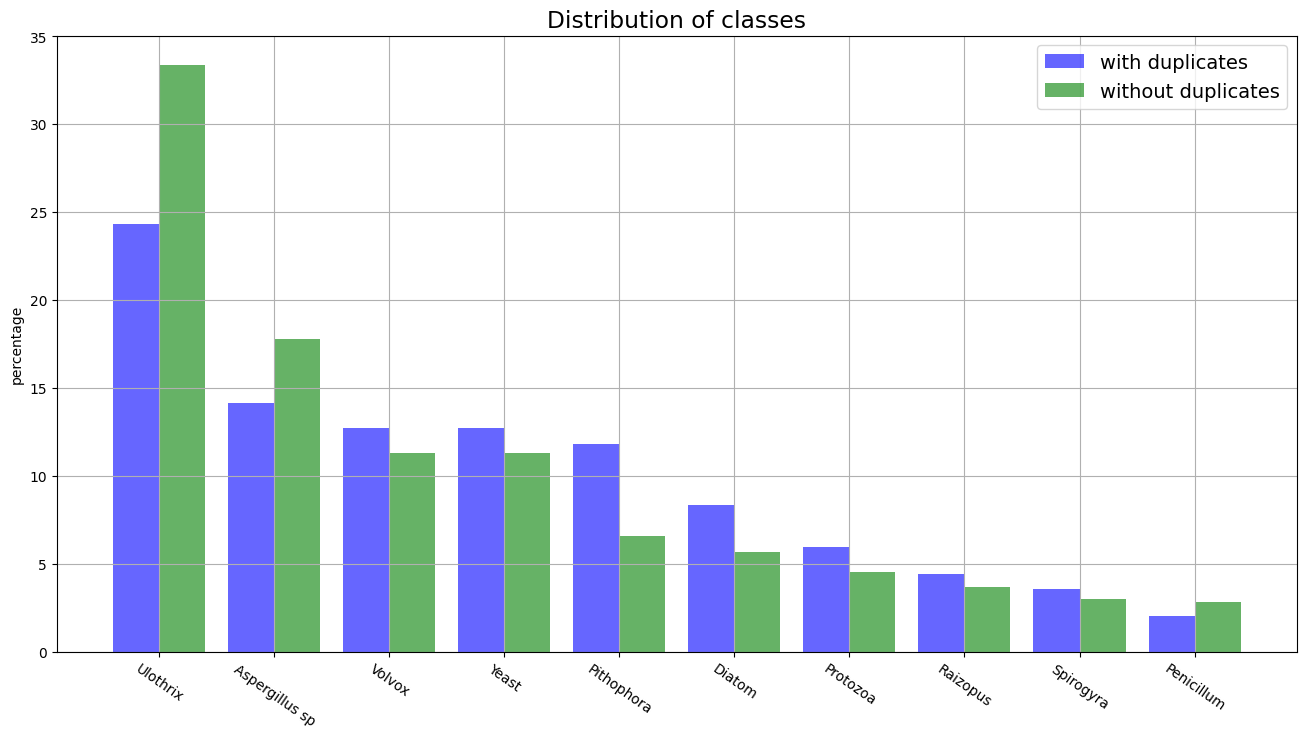

In [15]:
class_distribution = y_train.value_counts(normalize=True)*100
class_distrib_duplicates = train_df_no_dupl['microorganisms'].value_counts(normalize=True)*100

print('number of classes: ', len(class_distribution))

fig, ax = plt.subplots(figsize=(16, 8))
plt.rcParams.update({'font.size': 14})
indices = np.arange(0,10,1)

bar_width = 0.4
bars1 = ax.bar(indices, class_distribution, bar_width, label='with duplicates', color='blue', alpha=0.6)
bars2 = ax.bar(indices + bar_width, class_distrib_duplicates, bar_width, label='without duplicates', color='green', alpha=0.6)

ax.set_ylabel('percentage')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(class_distrib_duplicates.index)


plt.title('Distribution of classes')
plt.xticks(rotation= -35)
plt.grid()
plt.legend()

We can observe that dataset is **highly** imbalanced, that is the reason to use stratify method in train_test_split.

### Boxplots and outliers

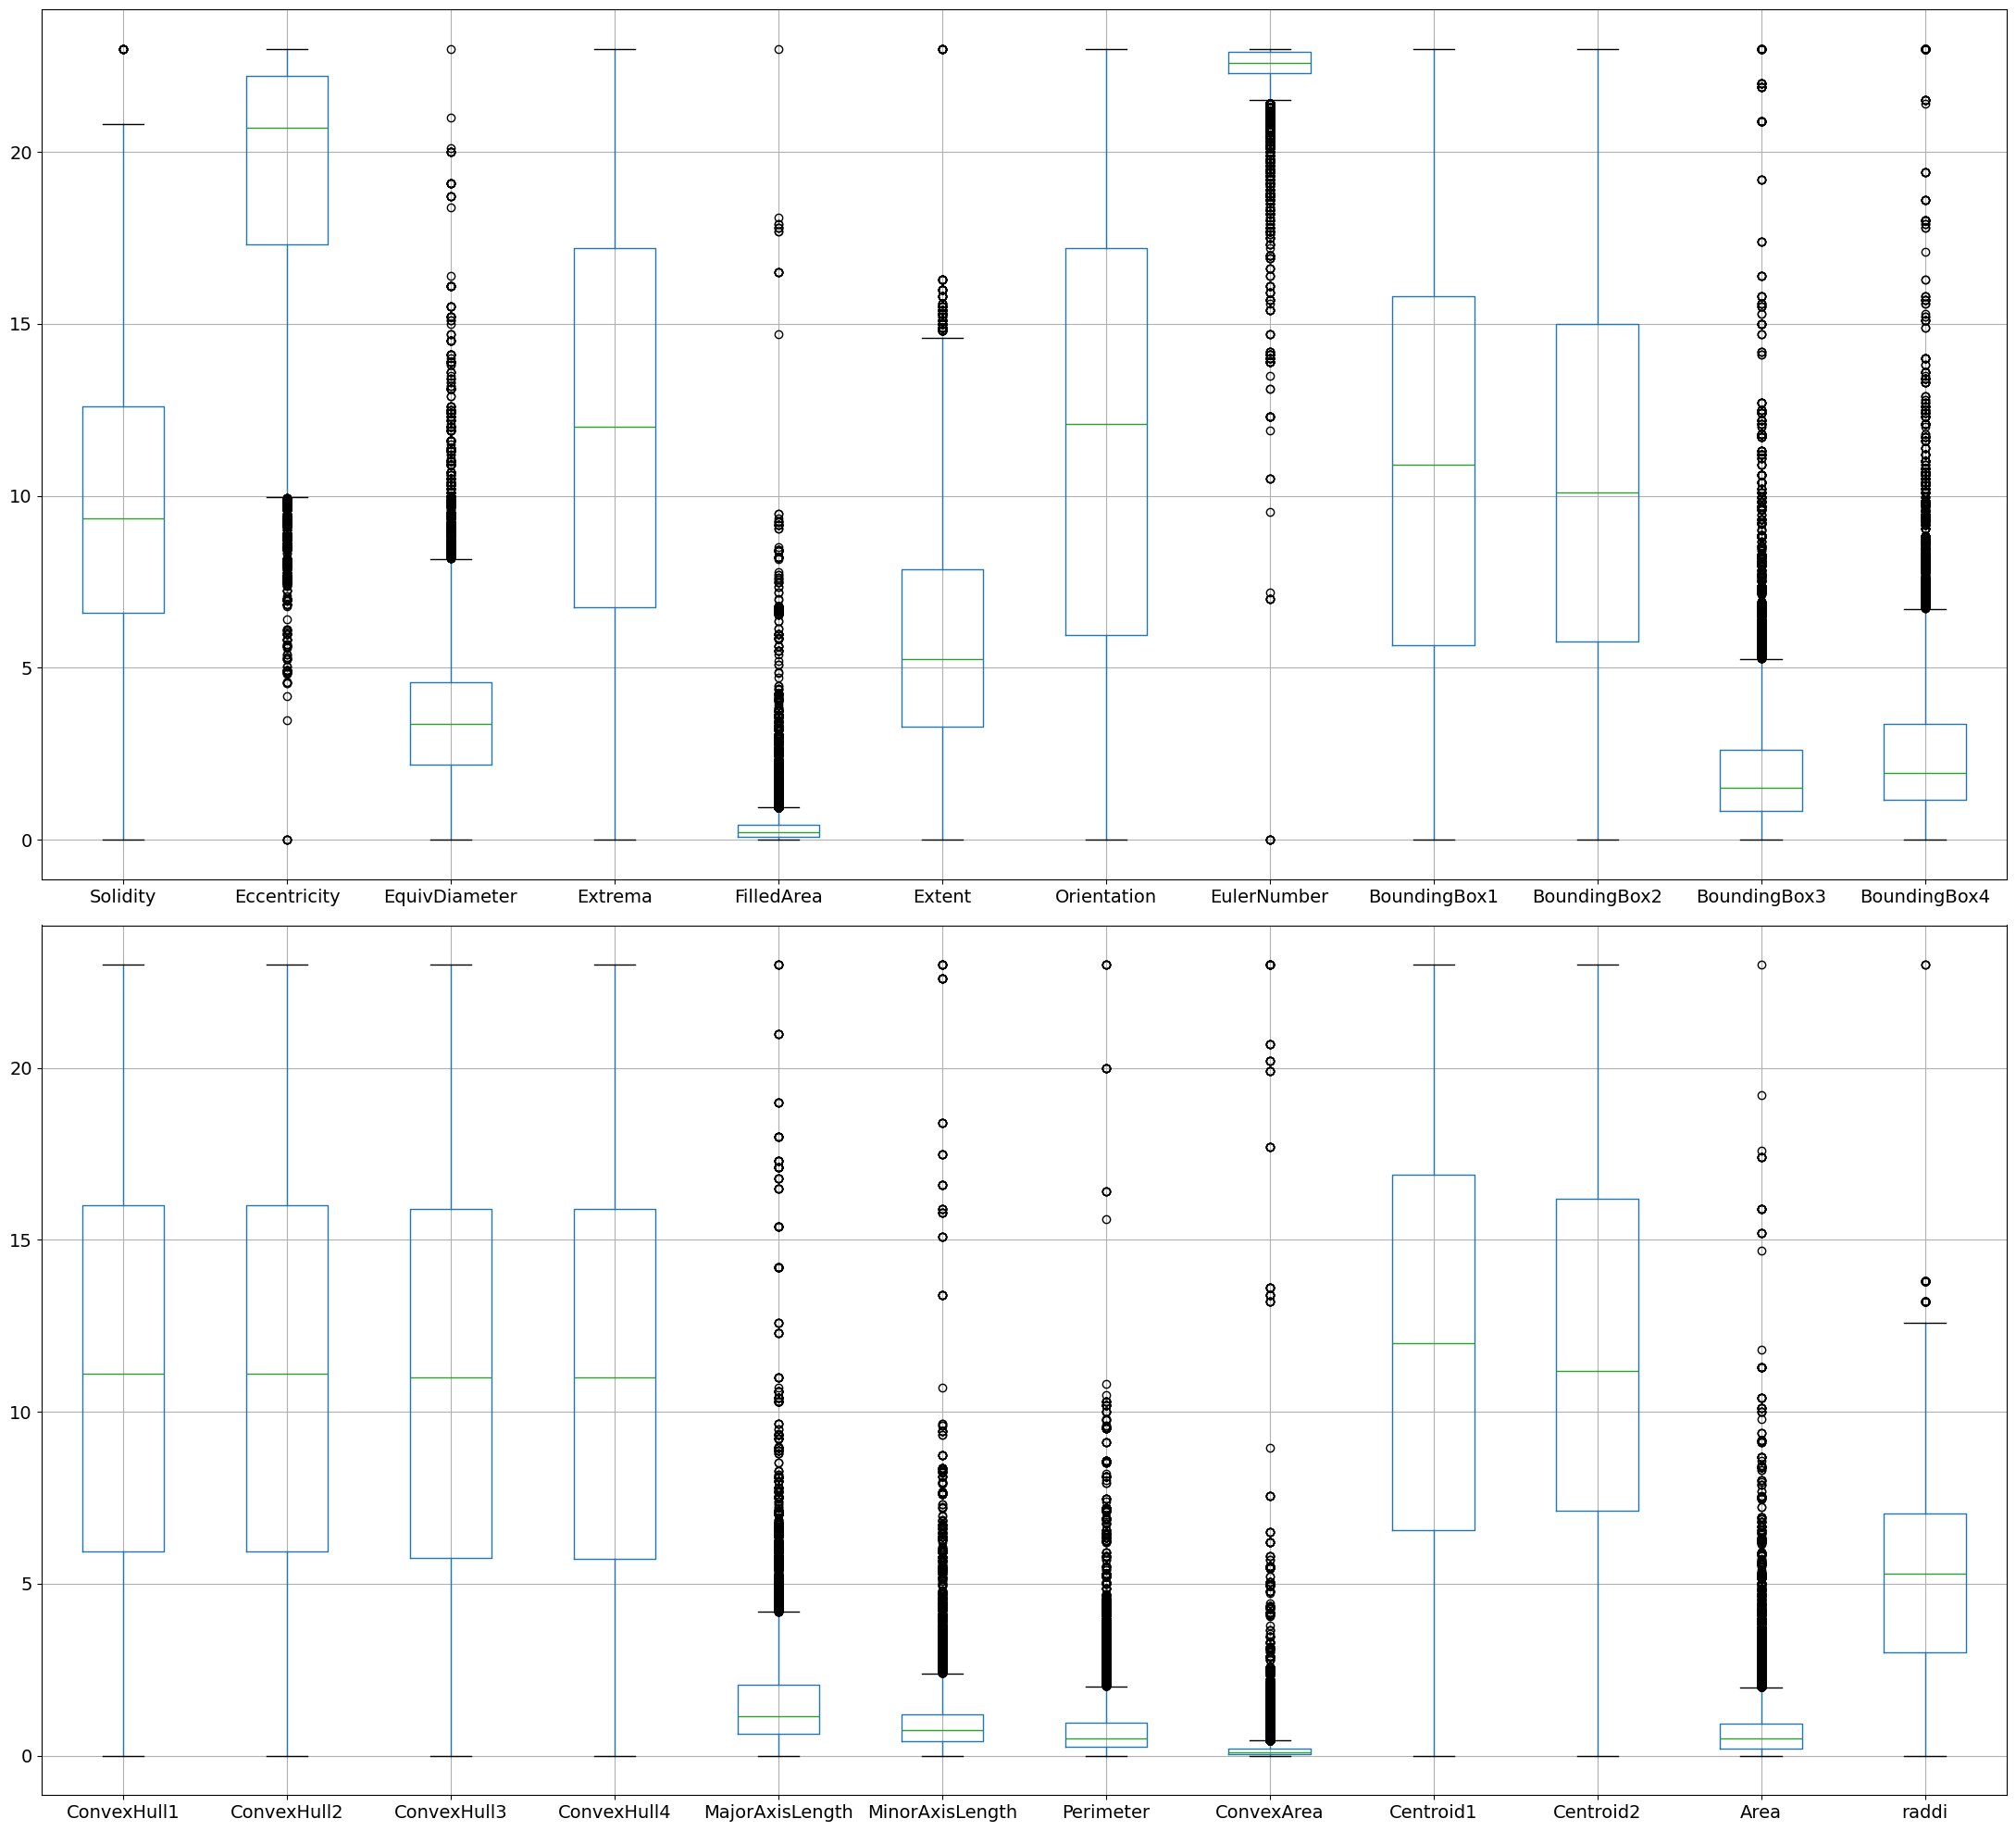

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 20))
x_train.boxplot(ax=ax1, column=list(x_train.columns)[:12], fontsize=14)
x_train.boxplot(ax=ax2, column=list(x_train.columns)[12:], fontsize=14)
plt.tight_layout()

From the boxplots above we can clearly see that the dataset contains a lot of extreme outliers. There are different ways to calculate outliers, namely using quantiles and standard deviation.

Firstly we calculate number of outliers using quantiles.

In [17]:
q25 = x_train.quantile(q=0.25)
q50 = x_train.quantile(q=0.50)
q75 = x_train.quantile(q=0.75)
iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

In [18]:
iqr_outliers = x_train[(x_train < lower_bound) | (x_train > upper_bound)].any(axis=1)

print('Number of outliers using IQR:', iqr_outliers.sum().max())

Number of outliers using IQR: 4196


Secondly we find outliers using standard deviation.

In [19]:
std = x_train.std(axis=0)
mean = x_train.mean(axis=0)
outliers = (abs(x_train - mean) > (3 * std))

print('Number of outliers using std:', outliers.sum().max())

Number of outliers using std: 418


We see that the number of outliers, calculated using IQR is 10 times bigger, using std. Then we will work with outliers using different transformators and comparing there influence on models.

### Distribution of features

<Figure size 2200x2000 with 0 Axes>

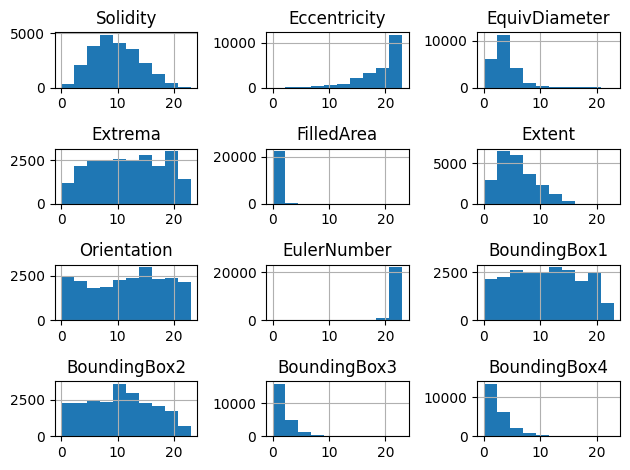

In [20]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(22, 20))
x_train[x_train.columns[:12]].hist()
plt.tight_layout()

<Figure size 2200x2000 with 0 Axes>

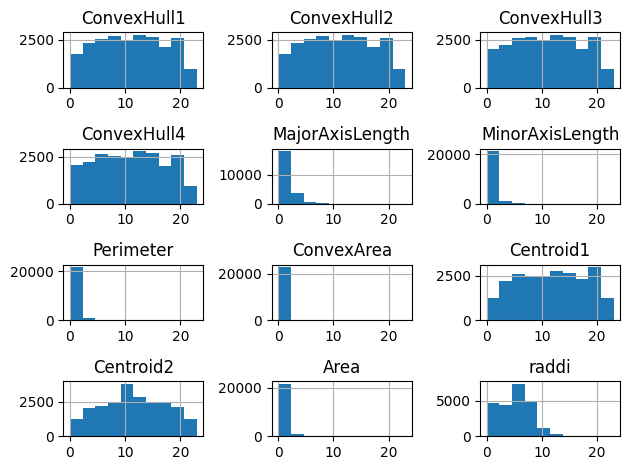

In [21]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(22, 20))
x_train[x_train.columns[12:]].hist()
plt.tight_layout()

We notice that the distribution of features is rarely standard, as well, some parameters take smaller values, then others. As the distribution is not Gaussian and we have outliers StandardScaler won't probably give good results.

### Corellation matrix

<Axes: >

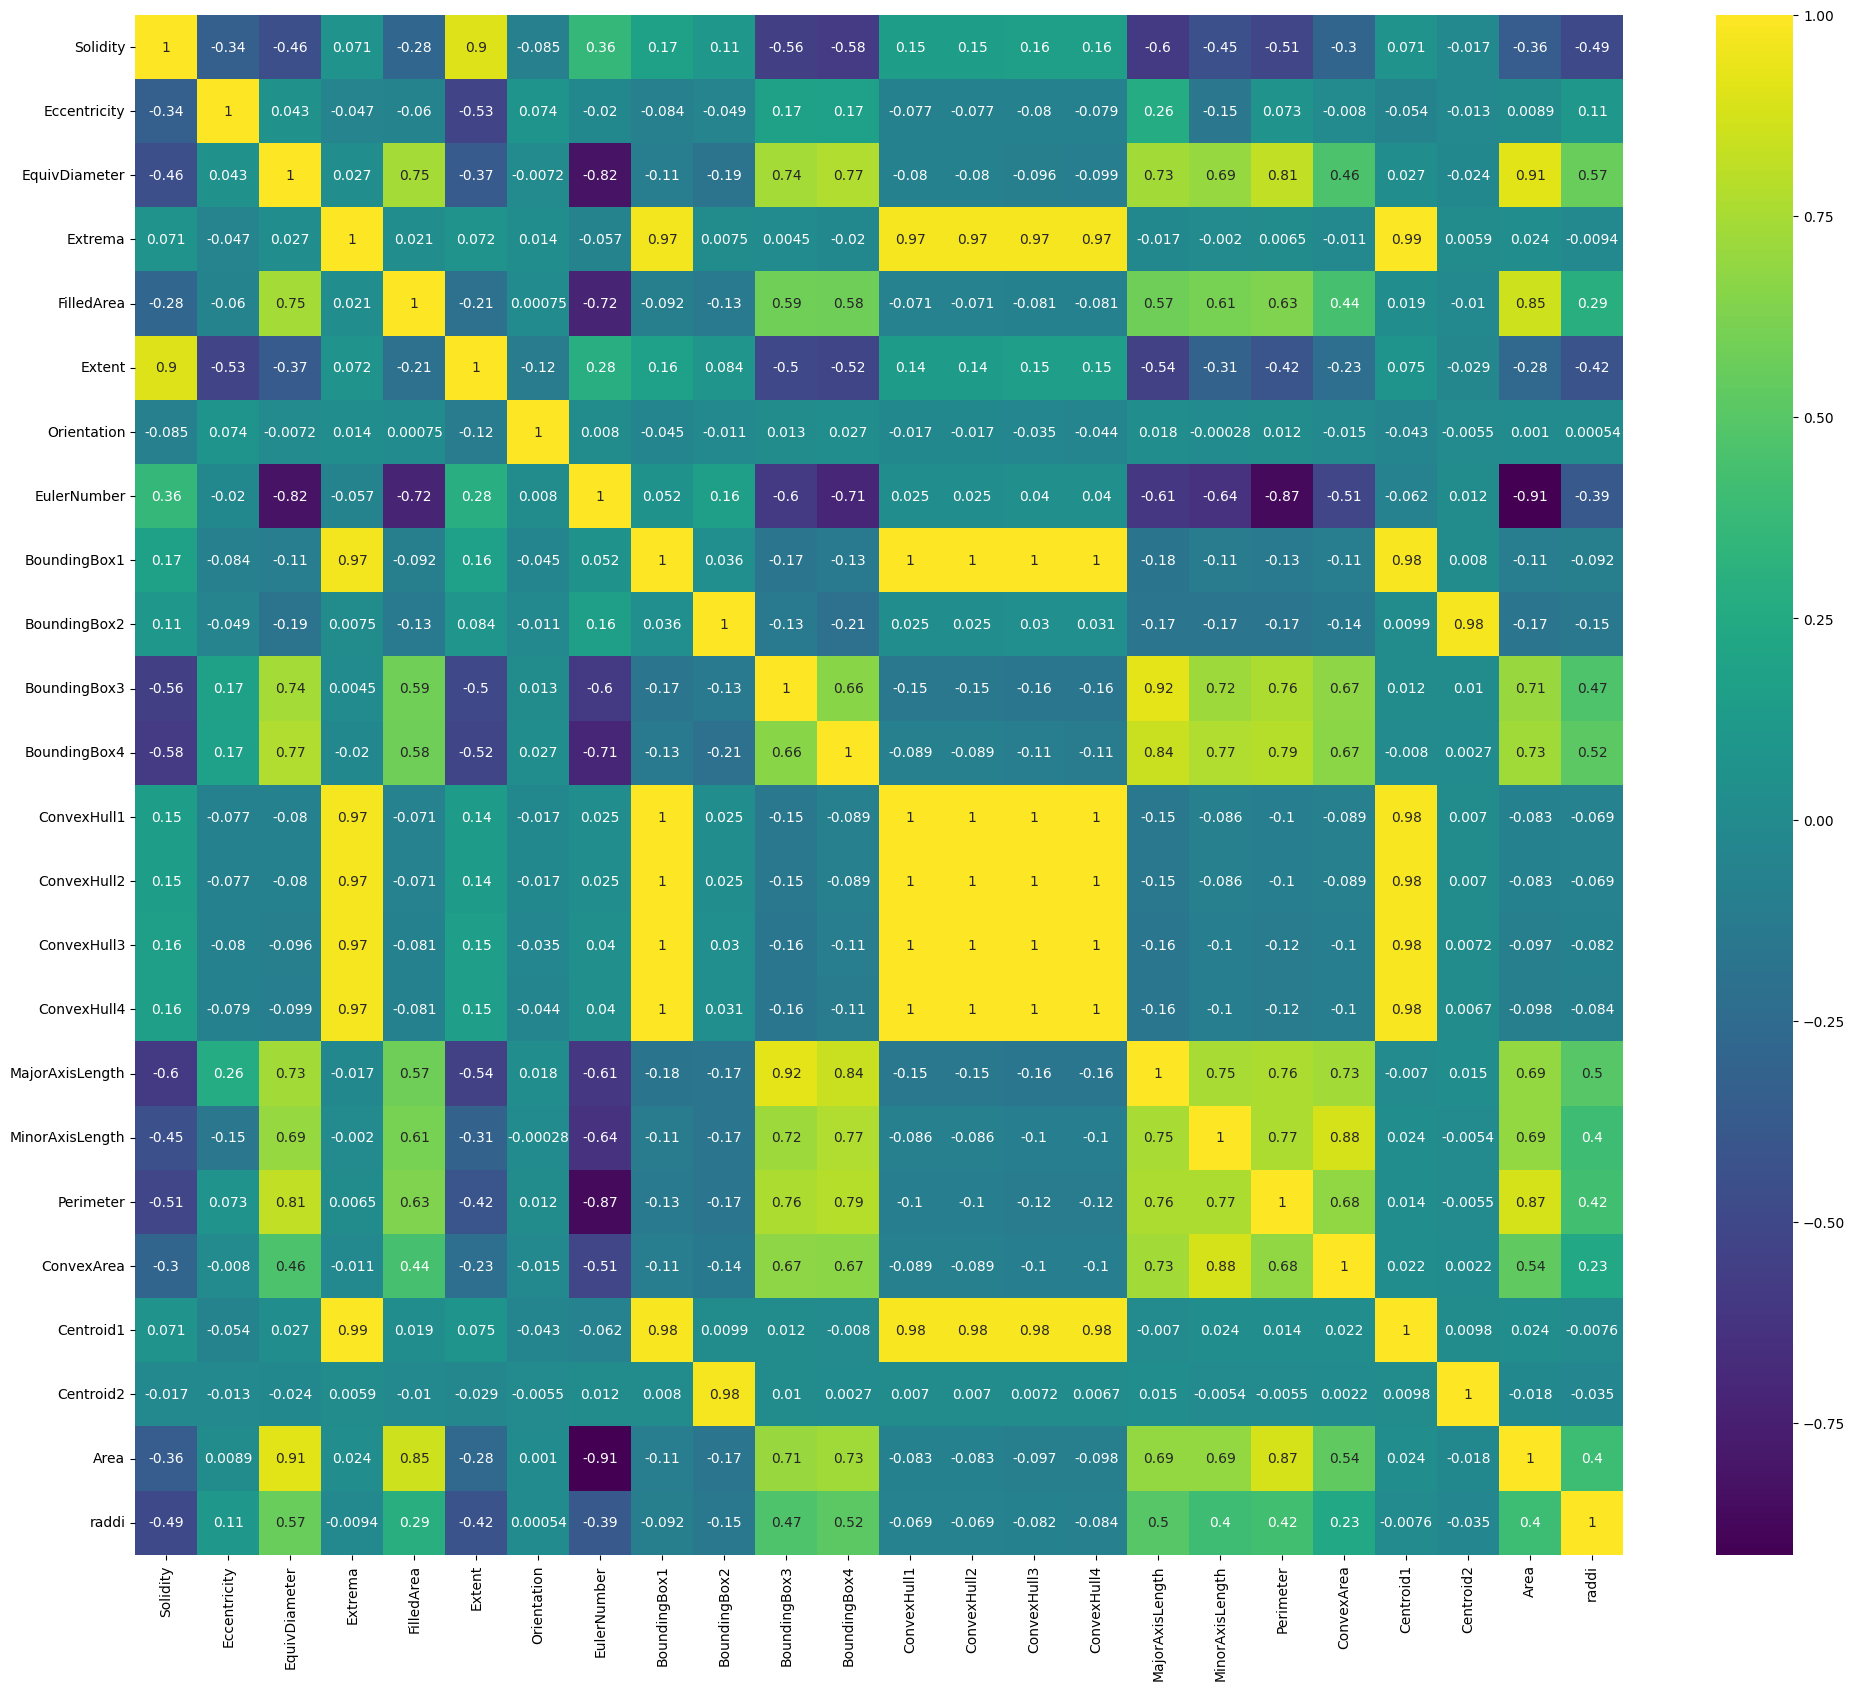

In [22]:
matrix = x_train.corr()
plt.figure(figsize=(24,20))
sns.heatmap(matrix, cmap="viridis", annot=True)

Having correlation coef equal to 1 and approximately equal to 1 is suspicuos, so we will look at these columns closer.

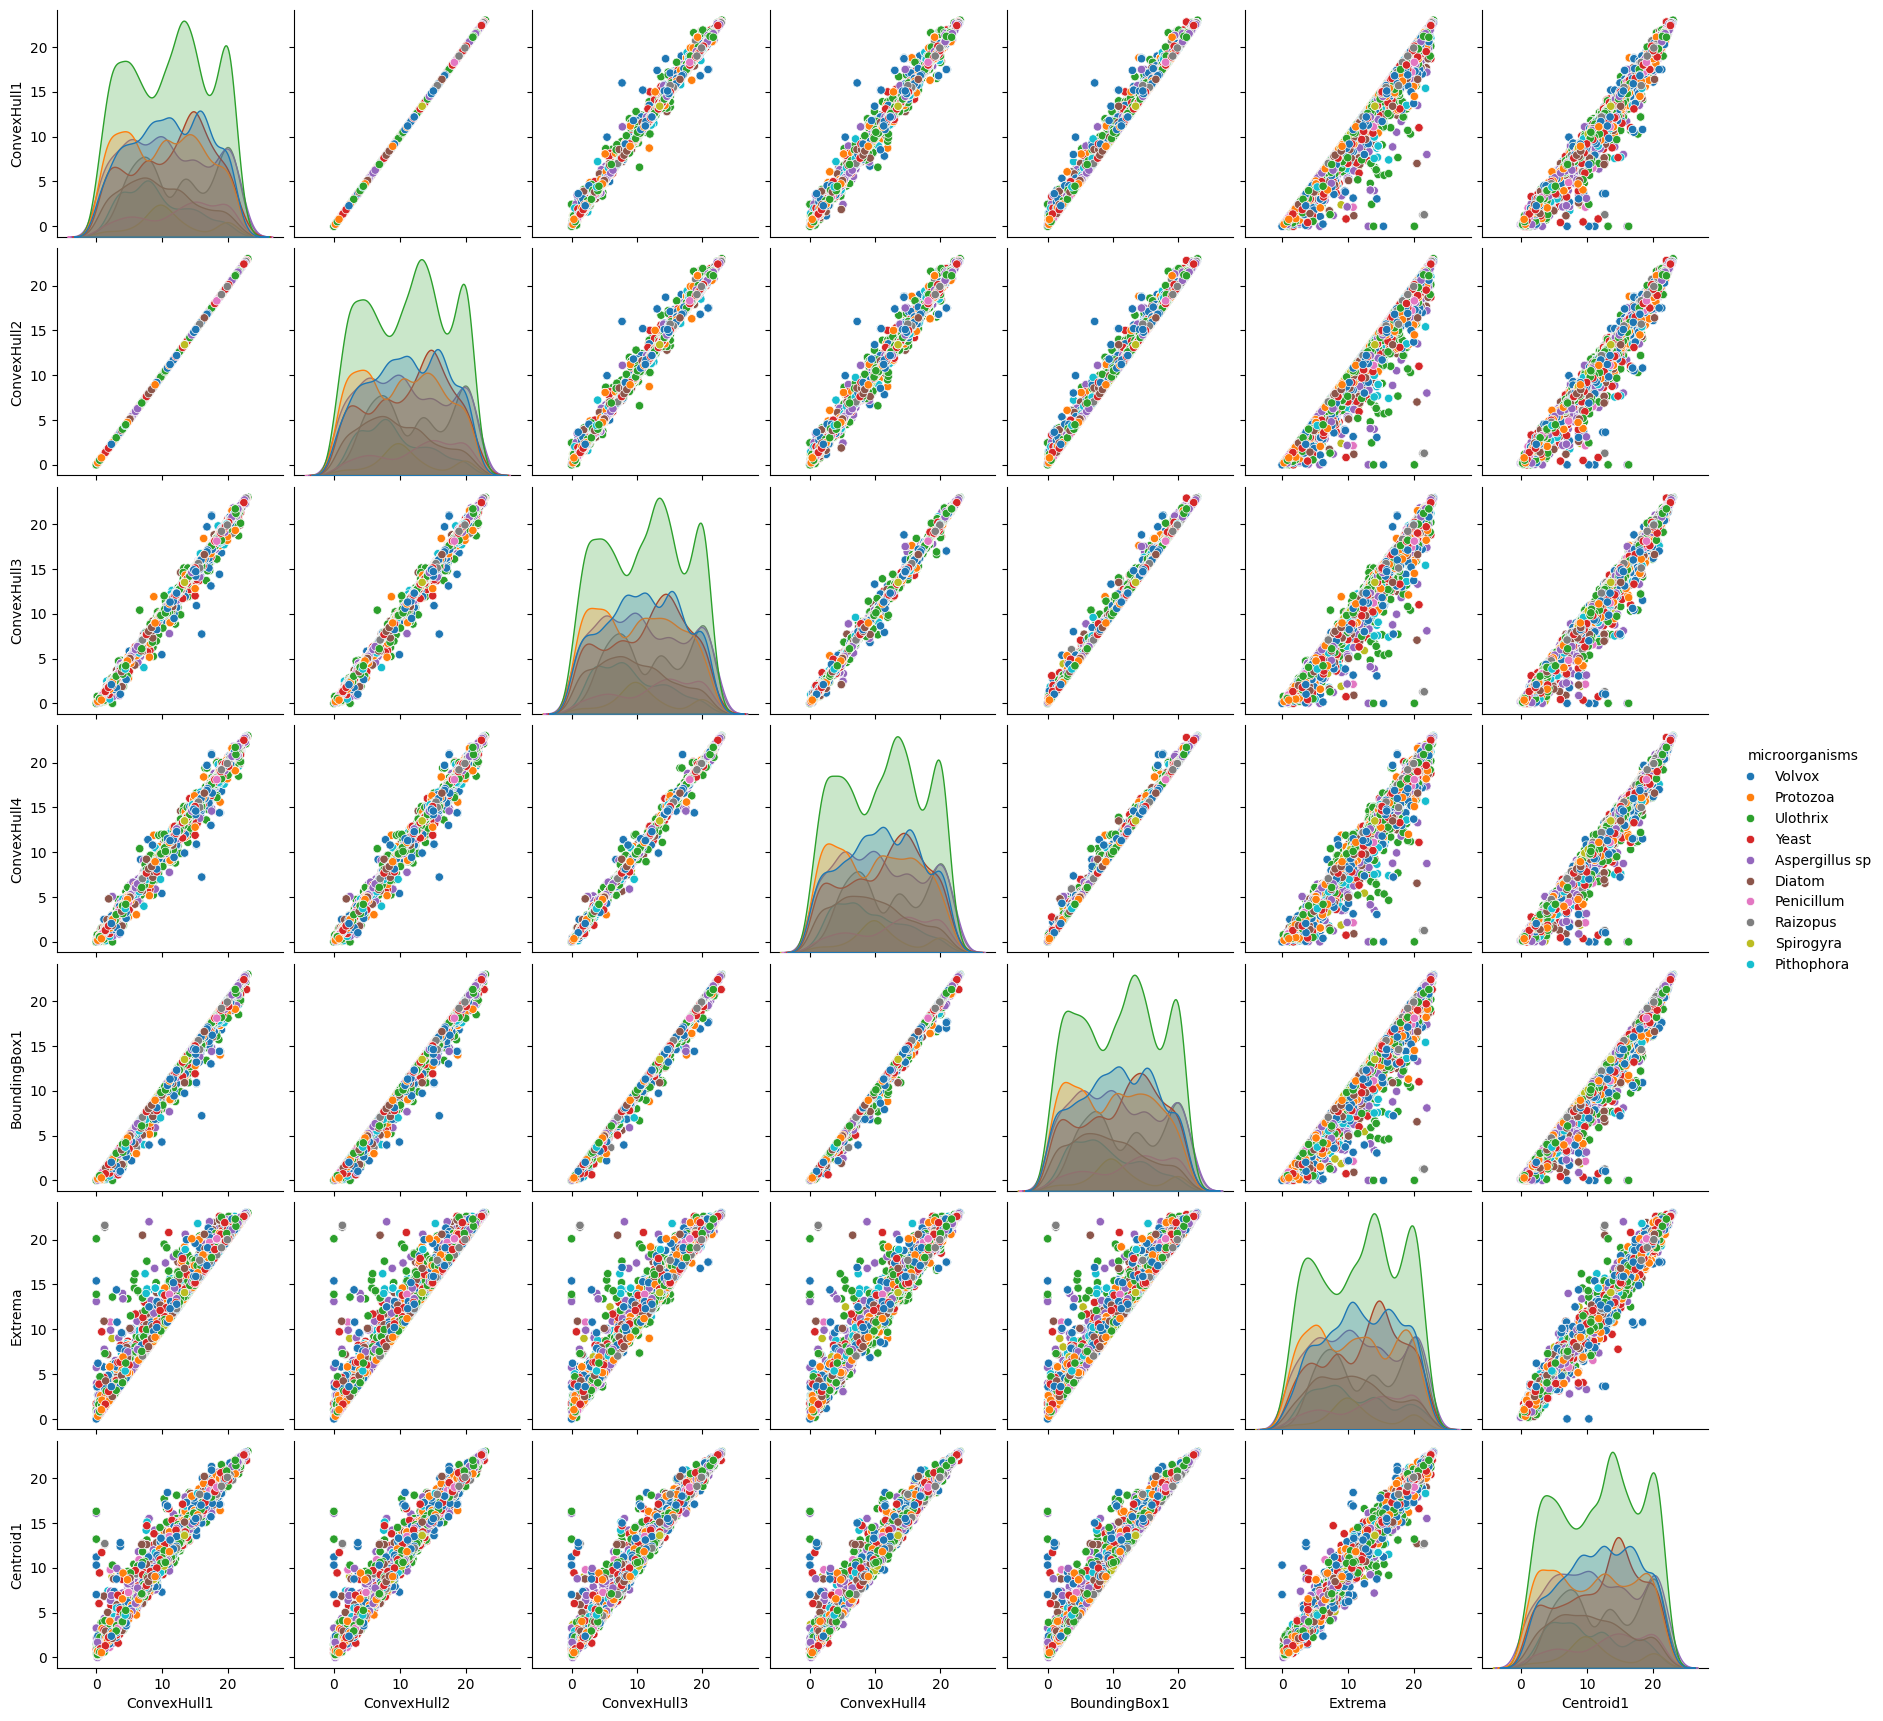

In [23]:
train_df = x_train.join(y_train)
sns.pairplot(
        data=train_df, 
        vars=train_df[['ConvexHull1', 'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'BoundingBox1', 'Extrema', 'Centroid1']],
        hue='microorganisms',
        )
plt.show()

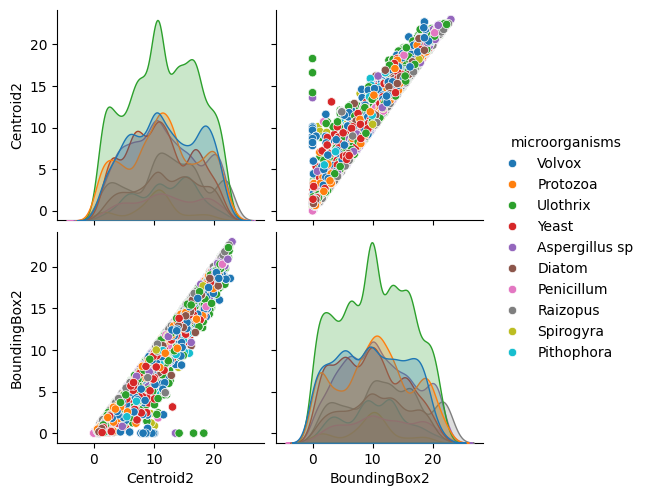

In [24]:
train_df = x_train.join(y_train)
sns.pairplot(
        data=train_df, 
        vars=train_df[['Centroid2', 'BoundingBox2', ]],
        hue='microorganisms',
        )
plt.show()

The linear dependence for all selected features is obvious, but the most strange dependence is between ConvexHull1 and ConvexHull2, so we want to compare these columns.

In [25]:
convex_hull_array = np.array(df[['ConvexHull1', 'ConvexHull2']])
print(np.sum(np.diff(convex_hull_array)))

0.0


As the difference between the entries of the ConvexHull1 and ConvexHull2 is equal to 0, we conclude that ConvexHull1=ConvexHull2 and delete this feature from data set (train and test data).

In [26]:
x_train.drop(columns='ConvexHull2', inplace=True)
x_test.drop(columns='ConvexHull2', inplace=True)

x_train_no_dupl = train_df_no_dupl.iloc[:, :-1]
y_train_no_dupl = train_df_no_dupl.iloc[:, -1]

x_train_no_dupl.drop(columns='ConvexHull2', inplace=True)
train_df.drop(columns='ConvexHull2', inplace=True)

In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22895 entries, 1026 to 563
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         22895 non-null  float64
 1   Eccentricity     22895 non-null  float64
 2   EquivDiameter    22895 non-null  float64
 3   Extrema          22895 non-null  float64
 4   FilledArea       22895 non-null  float64
 5   Extent           22895 non-null  float64
 6   Orientation      22895 non-null  float64
 7   EulerNumber      22895 non-null  float64
 8   BoundingBox1     22895 non-null  float64
 9   BoundingBox2     22895 non-null  float64
 10  BoundingBox3     22895 non-null  float64
 11  BoundingBox4     22895 non-null  float64
 12  ConvexHull1      22895 non-null  float64
 13  ConvexHull3      22895 non-null  float64
 14  ConvexHull4      22895 non-null  float64
 15  MajorAxisLength  22895 non-null  float64
 16  MinorAxisLength  22895 non-null  float64
 17  Perimeter       

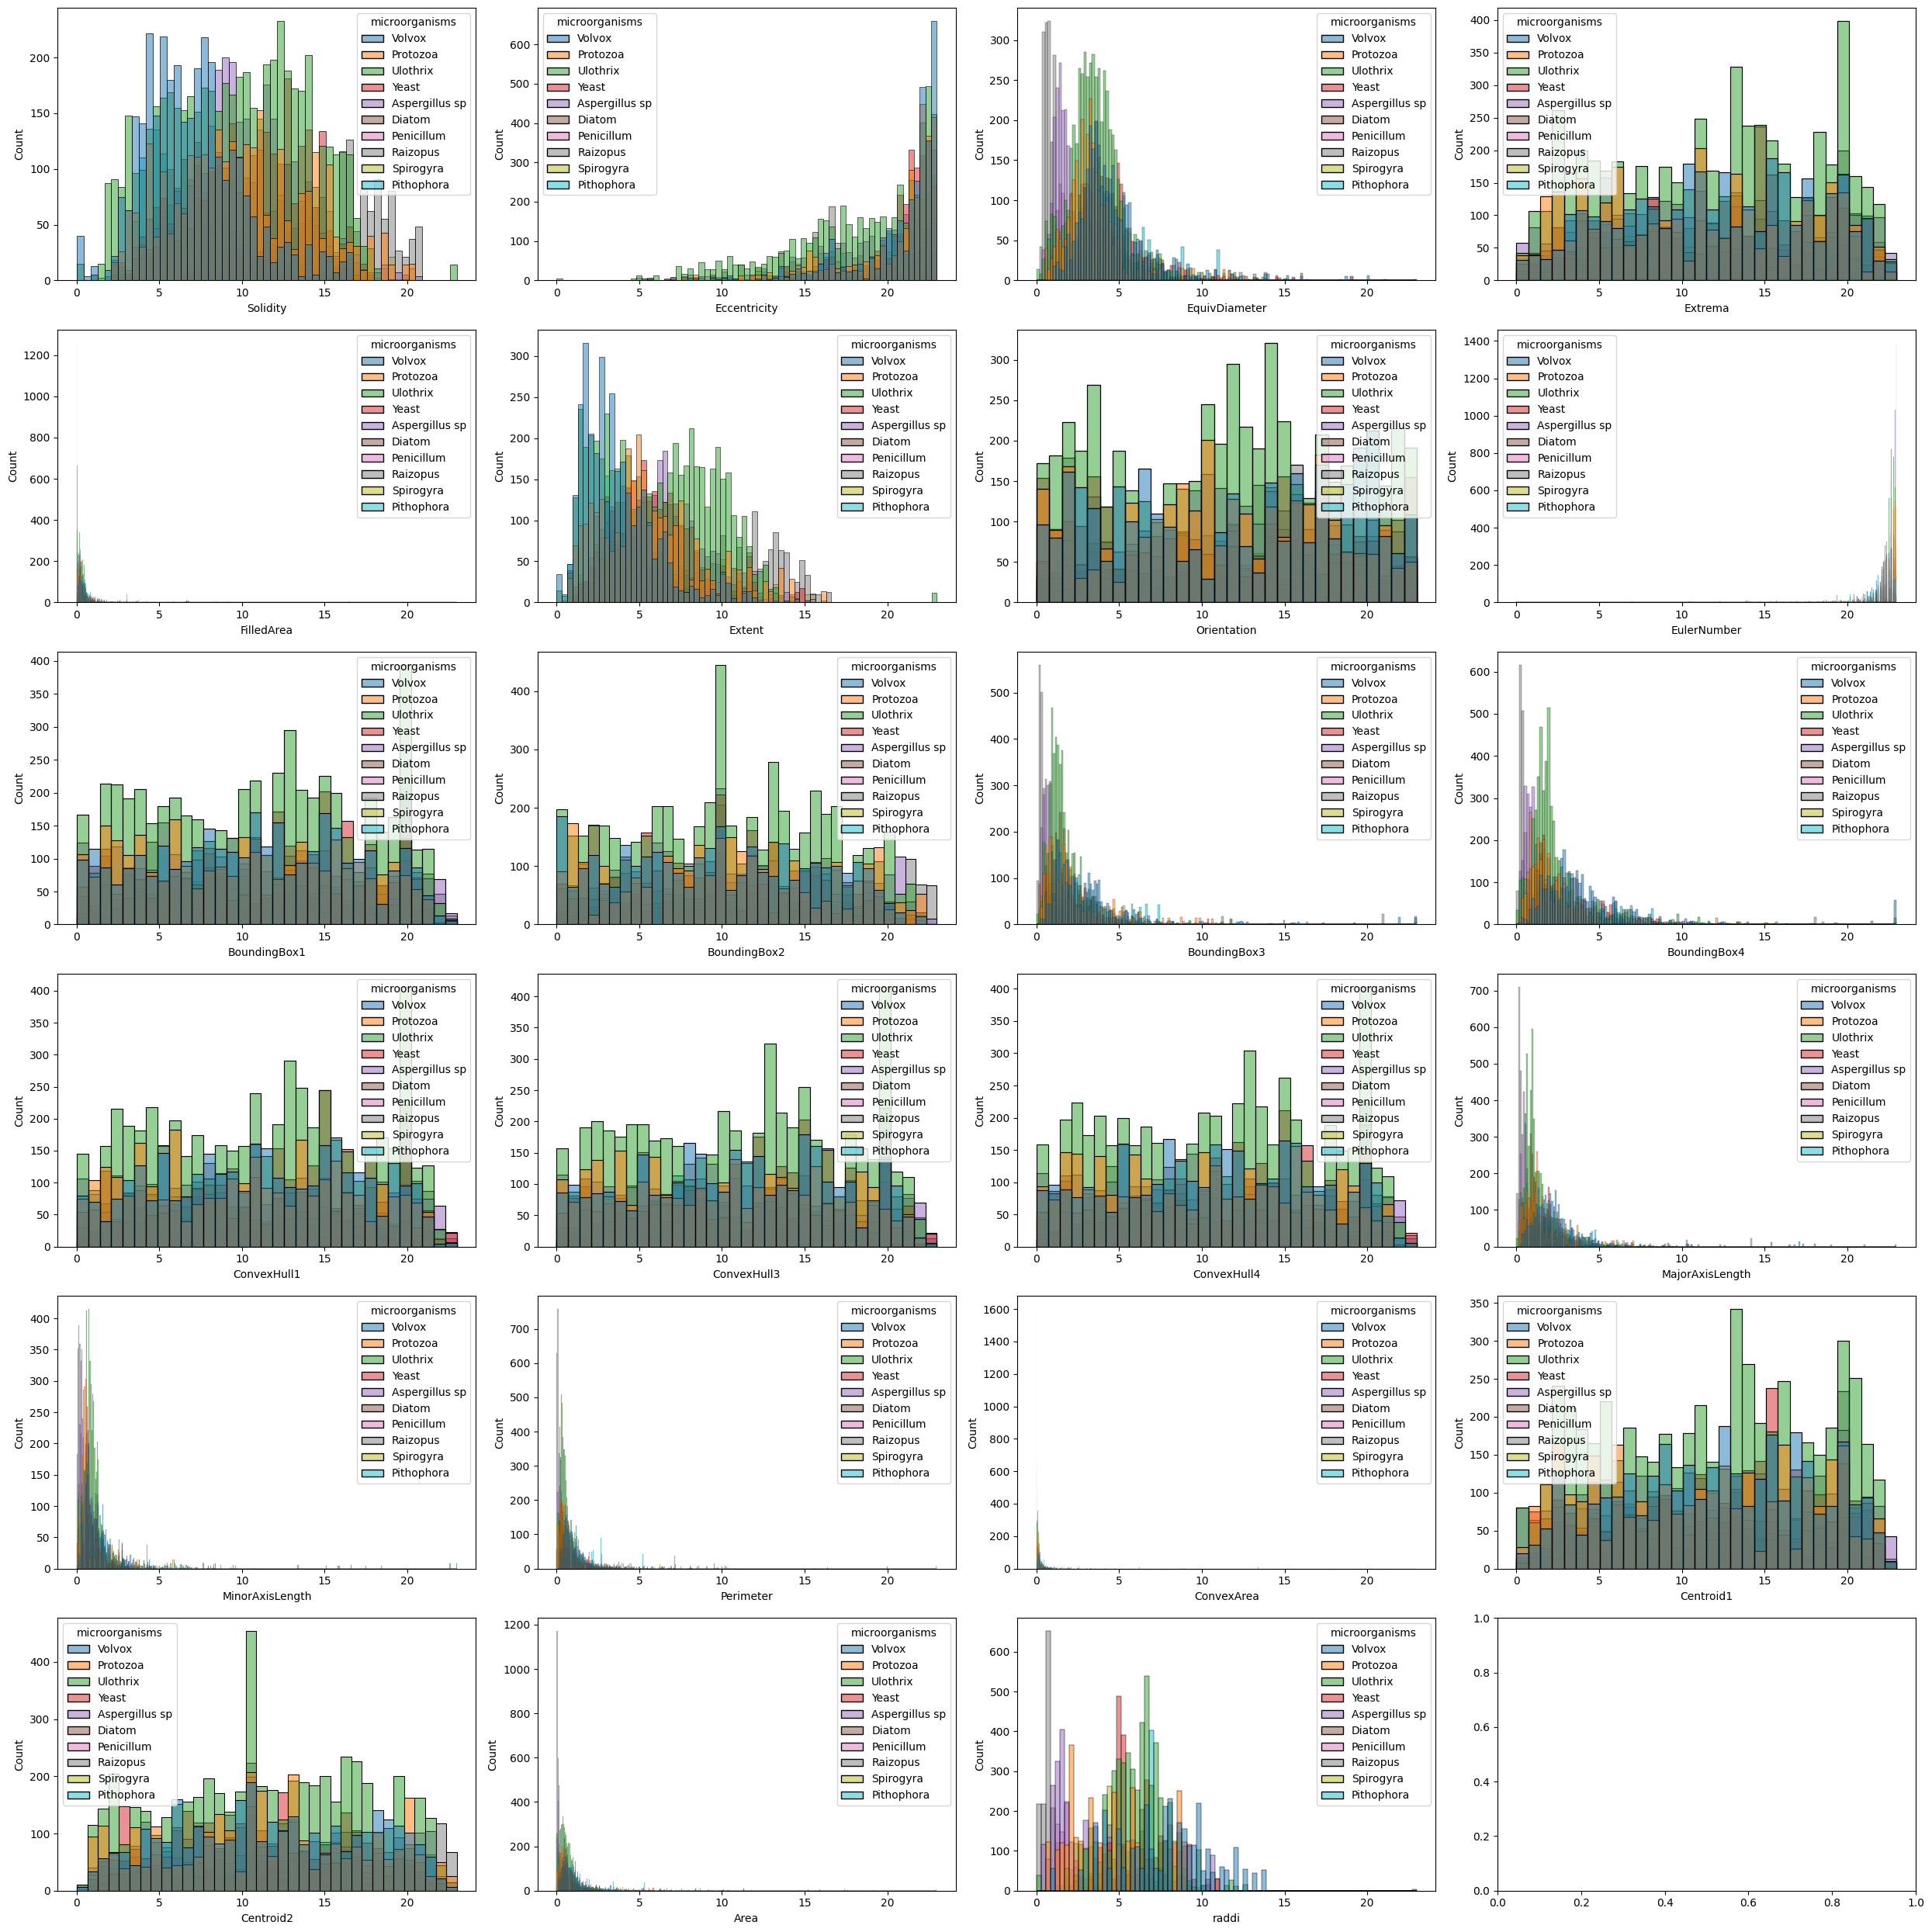

In [28]:
fig, ax = plt.subplots(6, 4, figsize=(25, 25))

for name, a in zip(train_df.columns[:-1], ax.ravel()):
  sns.histplot(data=train_df, x=name, hue="microorganisms", ax=a)

plt.tight_layout()
plt.show()

### Conclusion of EDA

We acknowledge the following problems:
1. The data set is highly imbalanced with the smallest class containing roughly 2% of data. However despite this fact we don't want to simplify the problem to binary classification or to classification of 2-3 biggest classes and will stick to multiclass classification of all given classes.
2. The data set contains outliers and is not standardised. For some classifiers (for example KNN of Logistic Regression) it is crucial for features to be in a specific range. Thus, we will use different transformers to shift and scale each feature in a suitable way.
3. The data set contains a huge amount of duplicates. However deleting them influences the distribution of the data among classes, so we don't decide to delete duplicates in advance and will study the behaviour of models with/without duplicates. 
4. The data set contains several columns with linear dependence. This issue as well will be a subject of study during modelling.
   
Model performance evaluation:  

As it states in the dataset description, the correct classification of given microorganism is crucial. Thus we assume that all classes have the same worth. Therefore, the most valuable metric for model evaluation shall be **Recall**, however, to gain a full picture of model performance we will also use **Cohen's Kappa** as it fits good with the imbalanced classification and finally a precision-recall curve to see corellation between recall and precision. It is also worth using confusion matrix to gain additional information of model performance.

### Data transformation

As data contains outliers and features take different range of values we will transform data before modelling. 
According to userguide (https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) we would like to compare the following transformers:
1. StandardScaler. According to userguide cannot guarantee balanced feature scales in the presence of outliers. We want to use it to compare what is 'good'/'bad' result for our data set.
2. MinMaxScaler. Min and max values we will calculate depending on mean and std for each feature, s.t. min = mean - 3std, max = mean + 3std.
3. RobustScaler. The centering and scaling statistics of RobustScaler are based on percentiles and are therefore not influenced by a small number of very large marginal outliers.
4. PowerTransformer. Applies a power transformation to each feature to make the data more Gaussian-like in order to stabilize variance and minimize skewness. The optimal scaling factor is determined via maximum likelihood estimation. Has 2 variations: Yeo-Johnson and Box-Cox. Box-Cox can only be applied to strictly positive data, that is not suitable for our case because of 0 values. So we will apply Yeo-Johnson method.
5. QuantileTransformer (uniform output). Applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform or Gaussian distribution. All the data, including outliers, will be mapped to a uniform distribution with the range [0, 1], making outliers indistinguishable from inliers.
6. QuantileTransformer (Gaussian output). 
7. Normalizer. Rescales the vector for each sample to have unit norm, independently of the distribution of the samples.

In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer

Firstly we transform initial data with duplicates.

In [93]:
x_train_scaled = [x_train, ]

For MinMaxScaler min and max parameters are different for each feature and depend on mean and std of this feature, so we compute them separately.

In [94]:
min_max_ranges = {}

for feature in x_train:
   min = mean[feature] - 3*std[feature]
   max = mean[feature] + 3*std[feature]
   min_max_ranges[feature] = (min, max)

min_max_x_train = pd.DataFrame(index=x_train.index)

for feature, (min_val, max_val) in min_max_ranges.items():
    min_max_scaler = MinMaxScaler(feature_range=(min_val, max_val))
    min_max_x_train[feature] = min_max_scaler.fit_transform(x_train[[feature]])

x_train_scaled.append(min_max_x_train)


In [95]:
scalers = [StandardScaler(),
           RobustScaler(),
           PowerTransformer(method='yeo-johnson'),
           QuantileTransformer(output_distribution='uniform'),
           QuantileTransformer(output_distribution='normal'),
           Normalizer(),
           ]

In [96]:
for scaler in scalers:
    x_train_scaled.append(pd.DataFrame(scaler.fit_transform(x_train)))

Transform data without duplicates.

In [97]:
x_train_scaled_no_dupl = [x_train_no_dupl, ]

In [98]:
min_max_ranges_no_dupl = {}

for feature in x_train_no_dupl:
   min = mean[feature] - 3*std[feature]
   max = mean[feature] + 3*std[feature]
   min_max_ranges_no_dupl[feature] = (min, max)

min_max_x_train_no_dupl = pd.DataFrame(index=x_train_no_dupl.index)

for feature, (min_val, max_val) in min_max_ranges_no_dupl.items():
    min_max_scaler = MinMaxScaler(feature_range=(min_val, max_val))
    min_max_x_train_no_dupl[feature] = min_max_scaler.fit_transform(x_train_no_dupl[[feature]])

x_train_scaled_no_dupl.append(min_max_x_train_no_dupl)

In [99]:
for scaler in scalers:
    x_train_scaled_no_dupl.append(pd.DataFrame(scaler.fit_transform(x_train_no_dupl)))

In x_train_scaled and x_train_scaled_no_dupl are stored transformed with different transformers data points in the following order.

In [100]:
list_of_scalers = [
    'No scaling',
    'MinMaxScaler',
    'StandardScaler',
    'RobustScaler',
    'PowerTransformer',
    'QuantileTransformer (uniform)',
    'QuantileTransformer (Gaussian)',
    'Normalizer',
    ]

## Modelling

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_predict
from sklearn.metrics import recall_score, f1_score, cohen_kappa_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In this section we will try each models with default parameters and then will tune them.

### kNearestNeighbors

For better comparison of results we will save them into a dataframe. 

In [102]:
data = {
    'Scaler': None,
    'train accuracy' : None,
    'test accuracy': None,
    'macro recall': None,
    'macro f1': None,
    'Cohens Kappa': None,
}

In [40]:
kNN_quick_scores = pd.DataFrame(data=data, index=np.arange(len(list_of_scalers)))

skf = StratifiedKFold(n_splits=5) #default parameter

for count, x_train_scale in enumerate(x_train_scaled):

    neigh = KNeighborsClassifier(n_neighbors=5) #default parameter

    scores_kNN_base = cross_validate(neigh,
                        x_train_scale,
                        y_train,
                        cv=skf, 
                        return_train_score=True)
    
    predictions_kNN_base = cross_val_predict(neigh,
                                x_train_scale,
                                y_train,
                                cv=skf,
                                method='predict',
                                )

    kNN_quick_scores.loc[count] = [
        list_of_scalers[count],
        scores_kNN_base['train_score'].mean(),
        scores_kNN_base['test_score'].mean(),
        recall_score(y_train, predictions_kNN_base, average='macro'),
        f1_score(y_train, predictions_kNN_base, average='macro'),
        cohen_kappa_score(y_train, predictions_kNN_base)
        ]

display(kNN_quick_scores)

Scaler train accuracy test accuracy macro recall  \
0                      No scaling       0.939332      0.885914     0.864217   
1                    MinMaxScaler       0.937137      0.877659     0.857062   
2                  StandardScaler       0.940795      0.886613     0.867514   
3                    RobustScaler       0.942466      0.889408     0.870695   
4                PowerTransformer       0.942531      0.889889     0.869505   
5   QuantileTransformer (uniform)       0.940587      0.889102     0.870712   
6  QuantileTransformer (Gaussian)       0.940555       0.88753     0.869649   
7                      Normalizer       0.938032      0.883206     0.861755   

   macro f1 Cohens Kappa  
0  0.868327     0.867438  
1  0.860443     0.857862  
2  0.869711     0.868342  
3  0.873104     0.871563  
4  0.872359      0.87212  
5   0.87197     0.871259  
6  0.871509     0.869442  
7  0.865883     0.864315

We observe that the difference between transformed data and no transformation barely exists. That can indicate that the points that we considered as outliers actually don't influence kNN. One more important thing to notice: MinMaxScaler gives slightly worse results than any other transformers. That also probably indicates that our consideration of points further then +- 3 std from the mean was misleading.

In [70]:
kNN_quick_scores_no_dupl = pd.DataFrame(data=data, index=np.arange(len(list_of_scalers)))

skf = StratifiedKFold(n_splits=5) #default parameter

for count, x_train_scale in enumerate(x_train_scaled_no_dupl):

    neigh = KNeighborsClassifier(n_neighbors=5) #default parameter

    scores_kNN_base_no_dupl = cross_validate(neigh,
                        x_train_scale,
                        y_train_no_dupl,
                        cv=skf, 
                        return_train_score=True)
    
    predictions_kNN_no_dupl = cross_val_predict(neigh,
                                x_train_scale,
                                y_train_no_dupl,
                                cv=skf,
                                method='predict',
                                )

    kNN_quick_scores_no_dupl.loc[count] = [
        list_of_scalers[count],
        scores_kNN_base_no_dupl['train_score'].mean(),
        scores_kNN_base_no_dupl['test_score'].mean(),
        recall_score(y_train_no_dupl, predictions_kNN_no_dupl, average='macro'),
        f1_score(y_train_no_dupl, predictions_kNN_no_dupl, average='macro'),
        cohen_kappa_score(y_train_no_dupl, predictions_kNN_no_dupl)
        ]

display(kNN_quick_scores_no_dupl)

Scaler train accuracy test accuracy macro recall  \
0                      No scaling       0.643059      0.426503     0.278939   
1                    MinMaxScaler       0.622173      0.402424     0.252109   
2                  StandardScaler         0.6596      0.470472     0.320704   
3                    RobustScaler       0.660699      0.479059     0.341344   
4                PowerTransformer       0.661589      0.481778     0.347649   
5   QuantileTransformer (uniform)       0.655989      0.472984     0.330878   
6  QuantileTransformer (Gaussian)       0.661694      0.480105     0.349941   
7                      Normalizer       0.638923      0.432158     0.281358   

   macro f1 Cohens Kappa  
0  0.294166     0.275586  
1  0.262551     0.241162  
2   0.33756     0.334923  
3  0.360712     0.348034  
4  0.363471     0.352137  
5  0.344656     0.341116  
6  0.363646     0.351685  
7  0.293201     0.282778

We see that data without duplicates performs significantly worse than data with duplicates, so we won't take it into account further. As well, we suppose that duplicates in our data set are normal and aren't correlated with inputes mistakes.

Next we will tune model.

Initialize scoring parameters for GridSearchCV and RandomizedSearchCV.

In [42]:
def cohen_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred)

scoring = {
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'cohen_kappa': make_scorer(cohen_kappa)
}

Naive search for hyperparameter number of neighbors for kNN.

In [43]:
pipe = Pipeline([
    ('kNN', KNeighborsClassifier())
    ])
    
param_search = {
    'kNN__n_neighbors': np.arange(1, 21, 1),
    }
    
gridsearch = GridSearchCV(
    pipe,
    param_grid=param_search,
    scoring=scoring,
    refit='recall_macro',
    cv=5
    )
    
gridsearch.fit(x_train, y_train)

print("Best Parameters: ", gridsearch.best_params_)
print("Best macro Recall Score: ", gridsearch.best_score_)

print()

best_estimator = gridsearch.best_estimator_
cv_results = cross_validate(best_estimator, x_train, y_train, cv=5, scoring=scoring, return_train_score=True)
for metric in scoring.keys():
    train_scores = cv_results['train_' + metric]
    test_scores = cv_results['test_' + metric]
    print(f"Mean {metric} train score: {np.mean(train_scores)}")
    print(f"Mean {metric} test score: {np.mean(test_scores)}")
    print(f"Difference (train - test) for {metric}: {np.mean(train_scores) - np.mean(test_scores)}")
    print()

print()
# Evaluate the best estimator on the test set
test_metrics = gridsearch.score(x_test, y_test)
print("Test Metrics on the Test Set:")
print(test_metrics)

Best Parameters:  {'kNN__n_neighbors': 1}
Best macro Recall Score:  0.9540745150027549

Mean recall_macro train score: 1.0
Mean recall_macro test score: 0.9540745150027549
Difference (train - test) for recall_macro: 0.045925484997245136

Mean f1_macro train score: 1.0
Mean f1_macro test score: 0.9624781345435688
Difference (train - test) for f1_macro: 0.037521865456431214

Mean cohen_kappa train score: 1.0
Mean cohen_kappa test score: 0.9724087568883366
Difference (train - test) for cohen_kappa: 0.02759124311166339


Test Metrics on the Test Set:
0.9711241024855601


Best parameter n_neighbors = 1 can indicate overestimation of a model, so we will calculate and plot metrics for different values of this hyperparameter.

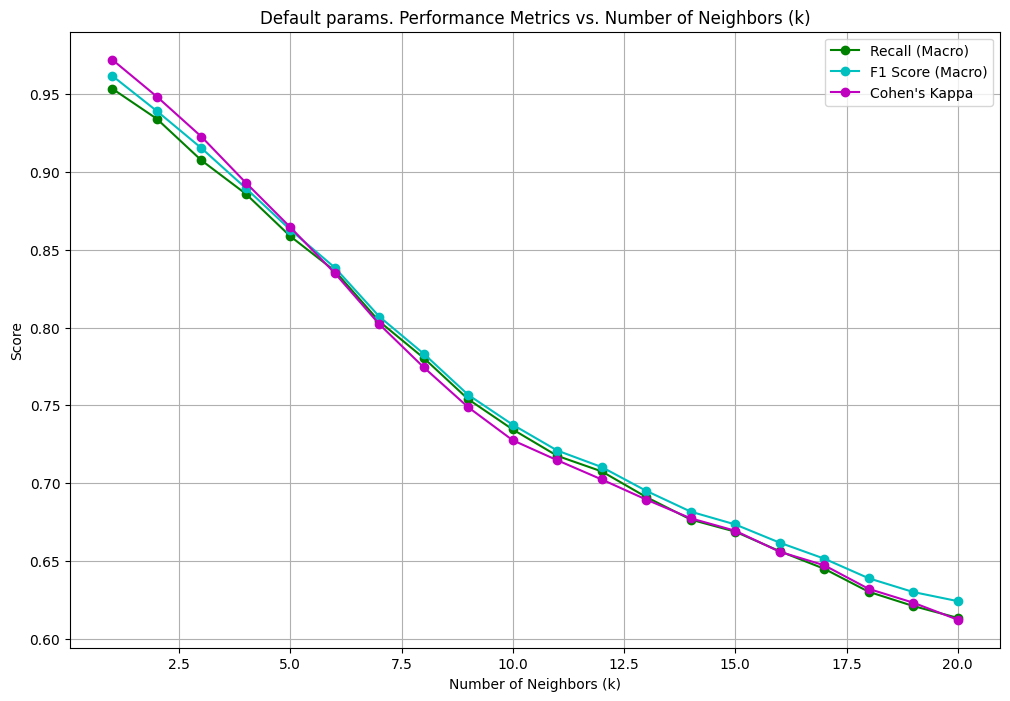

In [44]:
k_values = range(1, 21)

# Initialize lists to store the metric values
recall_macro = []
f1_macro = []
cohen_kappa = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Perform cross-validation and get predictions
    y_pred = cross_val_predict(knn, x_train, y_train, cv=skf)
    
    # Calculate metrics
    recall_macro.append(recall_score(y_train, y_pred, average='macro'))
    f1_macro.append(f1_score(y_train, y_pred, average='macro'))
    cohen_kappa.append(cohen_kappa_score(y_train, y_pred))

plt.figure(figsize=(12, 8))

plt.plot(k_values, recall_macro, marker='o', label='Recall (Macro)', color='g')
plt.plot(k_values, f1_macro, marker='o', label='F1 Score (Macro)', color='c')
plt.plot(k_values, cohen_kappa, marker='o', label="Cohen's Kappa", color='m')

plt.title('Default params. Performance Metrics vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.show()

We see that all metrics decrease significantly as we increase number of neighbors.

We try to tune kNN using search for other parameters of kNN. As we search for more parameters we will use RandomizedSearchCV to increase the speed of execution. However we will use different number of iteration to get reliable results.

In [45]:
param_search = {
    'kNN__n_neighbors': np.arange(1, 21, 1),
    'kNN__weights': ['uniform', 'distance'],
    'kNN__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'kNN__leaf_size': np.arange(1, 200, 1),
    }
    
for i in range(10, 31, 10): 
    pipe = Pipeline([
        ('kNN', KNeighborsClassifier())
        ])

    randomsearch = RandomizedSearchCV(
        pipe,
        param_distributions=param_search,
        n_iter=i,
        scoring=scoring,
        refit='recall_macro',
        cv=5,
        random_state=42
        )
    
    randomsearch.fit(x_train, y_train)
    print('Number of iterations =', i)
    print('Best parameters:', randomsearch.best_params_)
    print('Best macro Recall Score:', randomsearch.best_score_)

    best_estimator = randomsearch.best_estimator_
    cv_results = cross_validate(best_estimator, x_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    for metric in scoring.keys():
        scores_svc_base_no_dupl = cv_results['test_' + metric]
        print(f'Mean {metric} score: {np.mean(scores_svc_base_no_dupl)}')
    print()


Number of iterations = 10
Best parameters: {'kNN__weights': 'distance', 'kNN__n_neighbors': 8, 'kNN__leaf_size': 142, 'kNN__algorithm': 'brute'}
Best macro Recall Score: 0.9497435872013937
Mean recall_macro score: 0.9497435872013937
Mean f1_macro score: 0.9592793407951161
Mean cohen_kappa score: 0.9667214697208243

Number of iterations = 20
Best parameters: {'kNN__weights': 'distance', 'kNN__n_neighbors': 2, 'kNN__leaf_size': 86, 'kNN__algorithm': 'kd_tree'}
Best macro Recall Score: 0.9540745150027549
Mean recall_macro score: 0.9540745150027549
Mean f1_macro score: 0.9624781345435688
Mean cohen_kappa score: 0.9724087568883366

Number of iterations = 30
Best parameters: {'kNN__weights': 'distance', 'kNN__n_neighbors': 2, 'kNN__leaf_size': 86, 'kNN__algorithm': 'kd_tree'}
Best macro Recall Score: 0.9540745150027549
Mean recall_macro score: 0.9540745150027549
Mean f1_macro score: 0.9624781345435688
Mean cohen_kappa score: 0.9724087568883366



We see that many parameters were changed from default settings, and more important, that number of neighbors were increased without loss of performance.

We make the graphs to compare different parameters.

Firstly we just change the weights to distance.

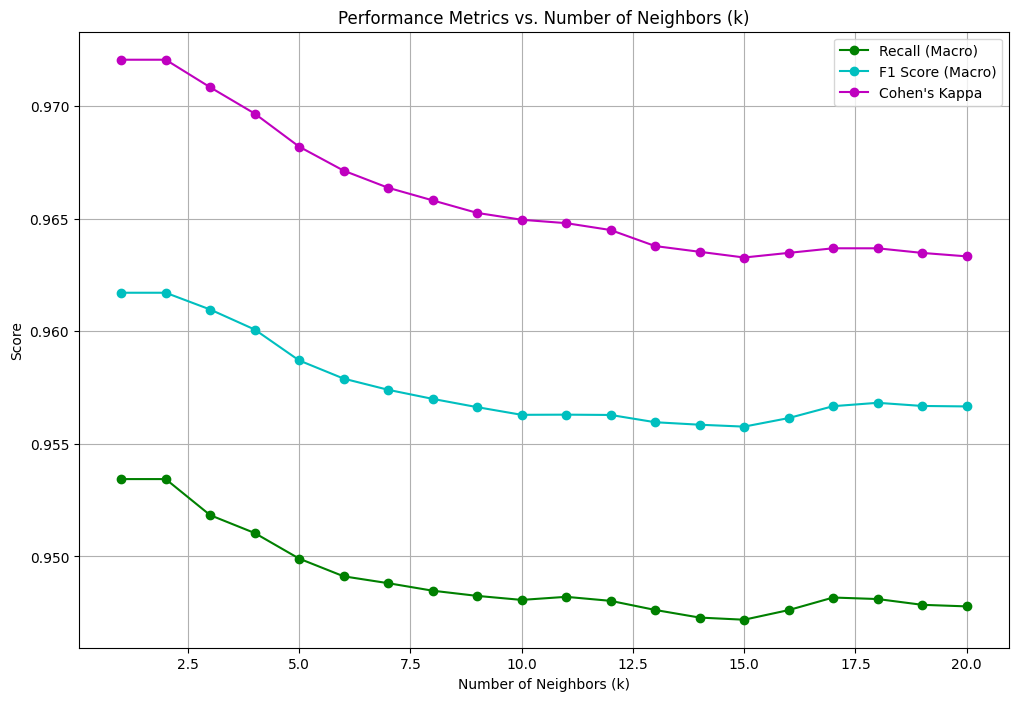

In [46]:
k_values = range(1, 21)

# Initialize lists to store the metric values
recall_macro = []
f1_macro = []
cohen_kappa = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(x_train, y_train)
    
    # Perform cross-validation and get predictions
    y_pred = cross_val_predict(knn, x_train, y_train, cv=skf)
    
    # Calculate metrics
    recall_macro.append(recall_score(y_train, y_pred, average='macro'))
    f1_macro.append(f1_score(y_train, y_pred, average='macro'))
    cohen_kappa.append(cohen_kappa_score(y_train, y_pred))

plt.figure(figsize=(12, 8))

plt.plot(k_values, recall_macro, marker='o', label='Recall (Macro)', color='g')
plt.plot(k_values, f1_macro, marker='o', label='F1 Score (Macro)', color='c')
plt.plot(k_values, cohen_kappa, marker='o', label="Cohen's Kappa", color='m')

plt.title('Performance Metrics vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.show()

We see that just changing of weights from uniform to distance highly improves the model. Increasing a number of Neighbors doesn't decrease scores that much anymore. 

Next we try different algorithms with weights=distance.

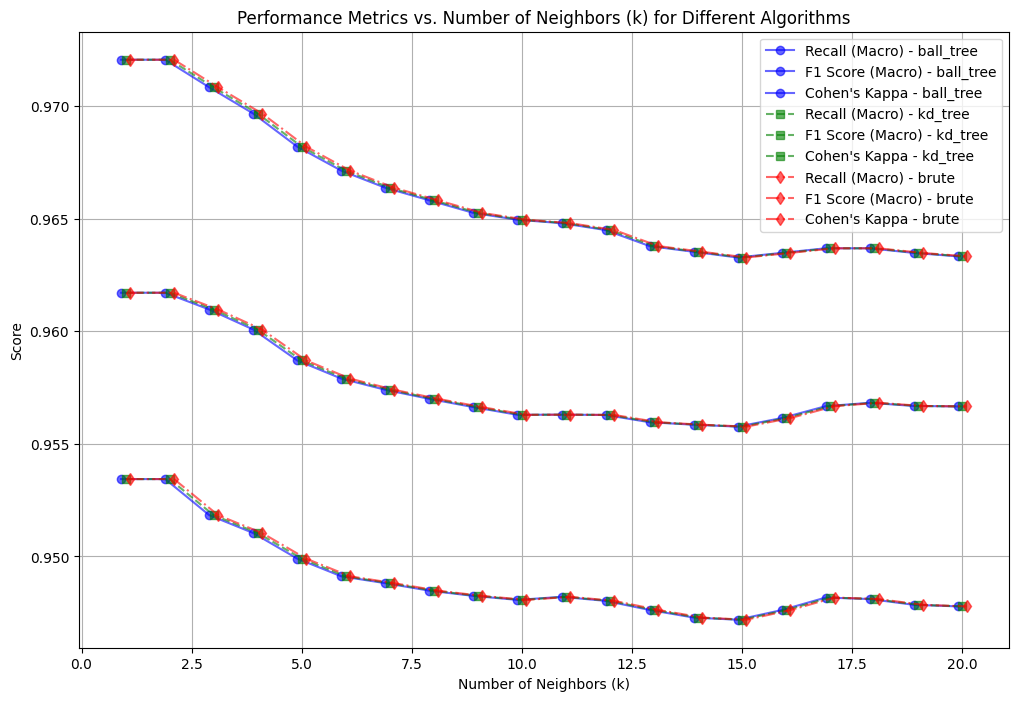

In [47]:
k_values = range(1, 21)

# Initialize dictionary to store the metric values for each algorithm
metrics = {
    'ball_tree': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'kd_tree': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'brute': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []}
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

algo = ['ball_tree', 'kd_tree', 'brute']

for al in algo:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm=al)
        knn.fit(x_train, y_train)
        
        # Perform cross-validation and get predictions
        y_pred = cross_val_predict(knn, x_train, y_train, cv=skf)
        
        # Calculate metrics and store in the corresponding lists
        metrics[al]['recall_macro'].append(recall_score(y_train, y_pred, average='macro'))
        metrics[al]['f1_macro'].append(f1_score(y_train, y_pred, average='macro'))
        metrics[al]['cohen_kappa'].append(cohen_kappa_score(y_train, y_pred))


colors = {'ball_tree': 'b', 'kd_tree': 'g', 'brute': 'r'}
markers = {'ball_tree': 'o', 'kd_tree': 's', 'brute': 'd'}
linestyles = {'ball_tree': '-', 'kd_tree': '--', 'brute': '-.'}

plt.figure(figsize=(12, 8))

for al in algo:
    offset = 0.1 * (algo.index(al) - 1)  # Offset for the x-values
    k_values_offset = [k + offset for k in k_values]
    plt.plot(k_values_offset, metrics[al]['recall_macro'], marker=markers[al], linestyle=linestyles[al], label=f'Recall (Macro) - {al}', color=colors[al], alpha=0.6)
    plt.plot(k_values_offset, metrics[al]['f1_macro'], marker=markers[al], linestyle=linestyles[al], label=f'F1 Score (Macro) - {al}', color=colors[al], alpha=0.6)
    plt.plot(k_values_offset, metrics[al]['cohen_kappa'], marker=markers[al], linestyle=linestyles[al], label=f"Cohen's Kappa - {al}", color=colors[al], alpha=0.6)

plt.title('Performance Metrics vs. Number of Neighbors (k) for Different Algorithms')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

We see that changing of algorithms doesn't make any difference for performance of a model.

We try a few data transformers to see if data transformation impacts on model performance.
For data transformers we chosed:
1. StandardScaler.
2. RobustScaler.
3. QuantileTransformer with uniform and normal distributions.
Choice of RobustScaler and QuantileTransformer is made with help of sklearn guideline, that concludes that these two scalers perform the best with the outliers. However, as we saw in the first part, scalers didn't impact signficantly on model performance.

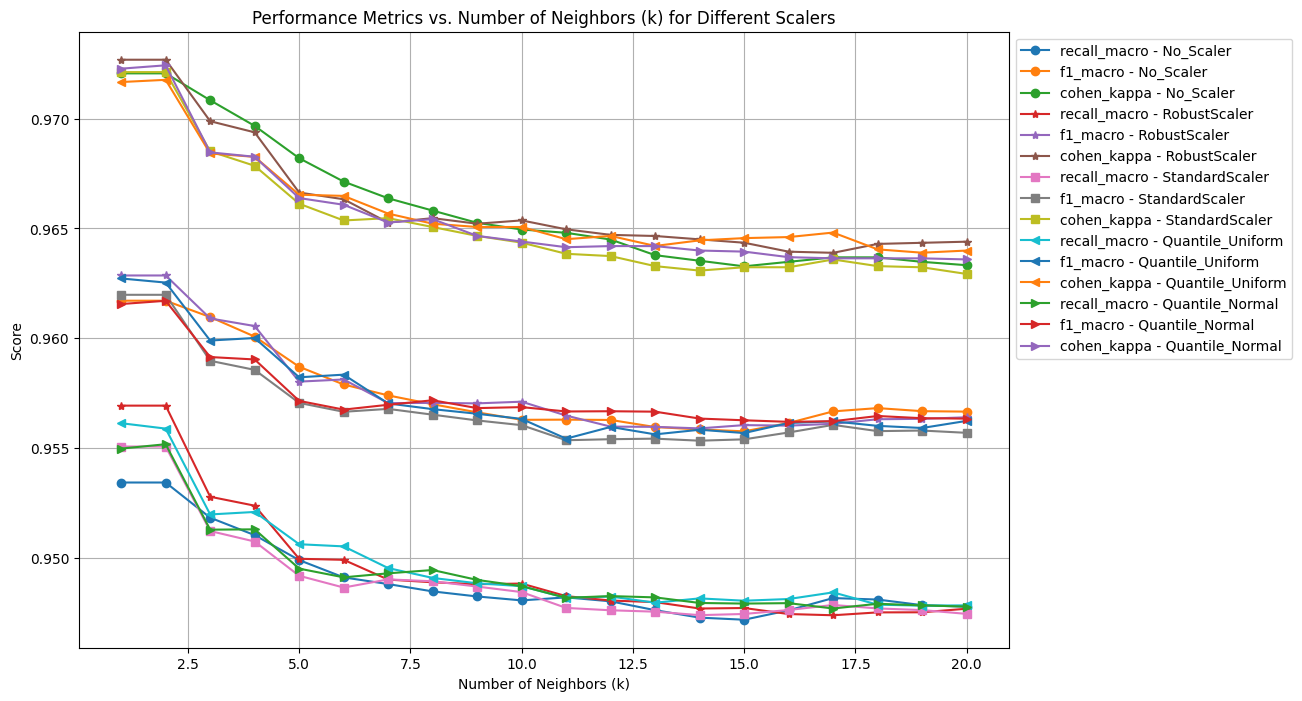

In [48]:
k_values = range(1, 21)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics = {
    'No_Scaler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'RobustScaler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'StandardScaler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'Quantile_Uniform': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'Quantile_Normal': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []}
}

for k in k_values:
    pipe_no_scaling = Pipeline([
        ('knn', KNeighborsClassifier(n_neighbors=k, weights='distance'))
    ])
    y_pred = cross_val_predict(pipe_no_scaling, x_train, y_train, cv=skf)
    
    metrics['No_Scaler']['recall_macro'].append(recall_score(y_train, y_pred, average='macro'))
    metrics['No_Scaler']['f1_macro'].append(f1_score(y_train, y_pred, average='macro'))
    metrics['No_Scaler']['cohen_kappa'].append(cohen_kappa_score(y_train, y_pred))

transformers = [
    ('RobustScaler', RobustScaler()),
    ('StandardScaler', StandardScaler()),
    ('Quantile_Uniform', QuantileTransformer(output_distribution='uniform')),
    ('Quantile_Normal', QuantileTransformer(output_distribution='normal')),
]

for transformer_name, transformer_obj in transformers:
    for k in k_values:
        pipe_with_scaling = Pipeline([
            ('scaler', transformer_obj),
            ('knn', KNeighborsClassifier(n_neighbors=k, weights='distance'))
        ])
        y_pred = cross_val_predict(pipe_with_scaling, x_train, y_train, cv=skf)
        
        metrics[transformer_name]['recall_macro'].append(recall_score(y_train, y_pred, average='macro'))
        metrics[transformer_name]['f1_macro'].append(f1_score(y_train, y_pred, average='macro'))
        metrics[transformer_name]['cohen_kappa'].append(cohen_kappa_score(y_train, y_pred))

# Plotting the results
plt.figure(figsize=(12, 8))
markers = {'No_Scaler': 'o', 'RobustScaler': '*', 'StandardScaler': 's', 'Quantile_Uniform': '<', 'Quantile_Normal': '>',}

for scaler_name in metrics:
    for metric_name in metrics[scaler_name]:
        plt.plot(k_values, metrics[scaler_name][metric_name], marker=markers[scaler_name], label=f'{metric_name} - {scaler_name}')

plt.title('Performance Metrics vs. Number of Neighbors (k) for Different Scalers')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()


We don't see any significant difference between scalers and suppose that their performance is defined by weights of neighbors in kNN.

Next we try different samplers to work with imbalance. We won't use any transformers as previous experience shows that it doesn't impact on model performance.

Firstly we do quick search for the best hyperparameter for SMOTE sampler.

In [49]:
param_distr = {
    'smote__k_neighbors': np.arange(1, 21, 1),
    'knn__n_neighbors': np.arange(1, 21, 1)
    }

for i in range(10, 41, 10):
    smote_pipe = ImbPipeline([
        ('smote', SMOTE(random_state=73)),
        ('knn', KNeighborsClassifier())
    ])
    smote_random = RandomizedSearchCV(smote_pipe, param_distributions=param_distr, n_iter=i, scoring='recall_macro', cv=5, random_state=42)
    smote_random.fit(x_train, y_train)
    print('Number of iterations =', i)
    print('Best parameters:', smote_random.best_params_)
    print('Best macro recall:', smote_random.best_score_)
    print()

Number of iterations = 10
Best parameters: {'smote__k_neighbors': 14, 'knn__n_neighbors': 2}
Best macro recall: 0.9476483387413396

Number of iterations = 20
Best parameters: {'smote__k_neighbors': 10, 'knn__n_neighbors': 1}
Best macro recall: 0.9574300686535822

Number of iterations = 30
Best parameters: {'smote__k_neighbors': 10, 'knn__n_neighbors': 1}
Best macro recall: 0.9574300686535822

Number of iterations = 40
Best parameters: {'smote__k_neighbors': 10, 'knn__n_neighbors': 1}
Best macro recall: 0.9574300686535822



Despite the fact that at the end number of neighbors converged to 1, we will set number of smote__k_neighbors=10, as it gave good results.

In [50]:
k_values = range(1, 21)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics = {
    'No_Sampling': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'RandomUnderSampler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'RandomOverSampler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'SMOTE': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for k in k_values:
    pipe_no_sampling = Pipeline([
        ('knn', KNeighborsClassifier(n_neighbors=k, weights='distance'))
    ])
    y_pred = cross_val_predict(pipe_no_sampling, x_train, y_train, cv=skf)
    
    metrics['No_Sampling']['recall_macro'].append(recall_score(y_train, y_pred, average='macro'))
    metrics['No_Sampling']['f1_macro'].append(f1_score(y_train, y_pred, average='macro'))
    metrics['No_Sampling']['cohen_kappa'].append(cohen_kappa_score(y_train, y_pred))

samplers = [
    ('RandomUnderSampler', RandomUnderSampler(random_state=42)),
    ('RandomOverSampler', RandomOverSampler(random_state=73)),
    ('SMOTE', SMOTE(k_neighbors=10, random_state=42)),
]

for sampler_name, sampler_obj in samplers:
    for k in k_values:
        pipe_with_sampling = ImbPipeline([
            ('sampler', sampler_obj),
            ('knn', KNeighborsClassifier(n_neighbors=k, weights='distance'))
        ])
        y_pred = cross_val_predict(pipe_with_sampling, x_train, y_train, cv=skf)
        
        metrics[sampler_name]['recall_macro'].append(recall_score(y_train, y_pred, average='macro'))
        metrics[sampler_name]['f1_macro'].append(f1_score(y_train, y_pred, average='macro'))
        metrics[sampler_name]['cohen_kappa'].append(cohen_kappa_score(y_train, y_pred))

# Plotting the results
plt.figure(figsize=(12, 8))
markers = {'No_Sampling': 'o', 'RandomUnderSampler': 'v', 'RandomOverSampler': '^', 'SMOTE':'s'}

for sampler_name in metrics:
    for metric_name in metrics[sampler_name]:
        plt.plot(k_values, metrics[sampler_name][metric_name], marker=markers[sampler_name], label=f'{metric_name} - {sampler_name}')

plt.title('Performance Metrics vs. Number of Neighbors (k) for Different Samplers')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

for sampler_name in metrics:
    if sampler_name == 'RandomUnderSampler':
        continue
    for metric_name in metrics[sampler_name]:
        plt.plot(k_values, metrics[sampler_name][metric_name], marker=markers[sampler_name], label=f'{metric_name} - {sampler_name}')

plt.title('Performance Metrics vs. Number of Neighbors (k) for Different Samplers')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()


KeyboardInterrupt: 

We see that significantly worse then other samplers perform RandomUnderSampler.

In [ ]:
kNN = KNeighborsClassifier(n_neighbors=2, weights='distance')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(kNN, x_train, y_train, cv=skf, scoring=scoring, return_train_score=True)

for metric in scoring.keys():
    train_scores = cv_results['train_' + metric]
    test_scores = cv_results['test_' + metric]
    print(f"Mean {metric} train score: {np.mean(train_scores)}")
    print(f"Mean {metric} test score: {np.mean(test_scores)}")
    print(f"Difference (train - test) for {metric}: {np.mean(train_scores) - np.mean(test_scores)}")
    print()

# Evaluate the best estimator on the test set
test_metrics = gridsearch.score(x_test, y_test)
print("Test Metrics on the Test Set:")
print(test_metrics)

Mean recall_macro train score: 1.0
Mean recall_macro test score: 0.9534318181665654
Difference (train - test) for recall_macro: 0.046568181833434585

Mean f1_macro train score: 1.0
Mean f1_macro test score: 0.9616895267945612
Difference (train - test) for f1_macro: 0.03831047320543879

Mean cohen_kappa train score: 1.0
Mean cohen_kappa test score: 0.9720556417891333
Difference (train - test) for cohen_kappa: 0.027944358210866715

Test Metrics on the Test Set:
0.9711241024855601


### Logistic regression

First, we evaluate Logistic Regresion performance with default parameters using different scalers.

In [51]:
logreg_quick_scores_no_duple = pd.DataFrame(data=data, index=np.arange(len(list_of_scalers)))
logreg_quick_scores = pd.DataFrame(data=data, index=np.arange(len(list_of_scalers)))

First, the data without duplicates.

In [52]:
for count, x_train_scale in enumerate(x_train_scaled_no_dupl):

    logreg = LogisticRegression(multi_class='multinomial', max_iter=500_000, solver='saga', n_jobs=-1)

    scores_svc_base_no_dupl = cross_validate(logreg,
                        x_train_scale,
                        y_train_no_dupl,
                        cv=skf, 
                        return_train_score=True)
    
    predictions_svc_base_no_dupl = cross_val_predict(logreg,
                                x_train_scale,
                                y_train_no_dupl,
                                cv=skf,
                                method='predict',
                                )

    logreg_quick_scores_no_duple.loc[count] = [
        list_of_scalers[count],
        scores_svc_base_no_dupl['train_score'].mean(),
        scores_svc_base_no_dupl['test_score'].mean(),
        recall_score(y_train_no_dupl, predictions_svc_base_no_dupl, average='macro'),
        f1_score(y_train_no_dupl, predictions_svc_base_no_dupl, average='macro'),
        cohen_kappa_score(y_train_no_dupl, predictions_svc_base_no_dupl)
        ]

In [53]:
display(logreg_quick_scores_no_duple)

Scaler train accuracy test accuracy macro recall  \
0                      No scaling       0.476549       0.45917     0.291932   
1                    MinMaxScaler       0.470477       0.45582      0.27243   
2                  StandardScaler       0.487751      0.474873     0.302059   
3                    RobustScaler       0.486233      0.474247     0.298566   
4                PowerTransformer       0.497749      0.482202     0.316977   
5   QuantileTransformer (uniform)       0.463306      0.453309     0.258884   
6  QuantileTransformer (Gaussian)       0.474403      0.460636     0.301534   
7                      Normalizer       0.398136       0.39217     0.146695   

   macro f1 Cohens Kappa  
0  0.299875     0.296372  
1  0.279598     0.284127  
2   0.31427     0.315181  
3  0.310658     0.313503  
4  0.326465     0.332779  
5  0.263404     0.282311  
6  0.309094     0.301057  
7  0.123934     0.133296

We see that in either case performance is terrible, so lets now try to evaluate it on the set with duplicates.

In [54]:
for count, x_train_scale in enumerate(x_train_scaled):

    logreg = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=500_000, n_jobs=-1)

    scores_svc_base_no_dupl = cross_validate(logreg,
                        x_train_scale,
                        y_train,
                        cv=skf, 
                        return_train_score=True)
    
    predictions_svc_base_no_dupl = cross_val_predict(logreg,
                                x_train_scale,
                                y_train,
                                cv=skf,
                                method='predict',
                                )

    logreg_quick_scores.loc[count] = [
        list_of_scalers[count],
        scores_svc_base_no_dupl['train_score'].mean(),
        scores_svc_base_no_dupl['test_score'].mean(),
        recall_score(y_train, predictions_svc_base_no_dupl, average='macro'),
        f1_score(y_train, predictions_svc_base_no_dupl, average='macro'),
        cohen_kappa_score(y_train, predictions_svc_base_no_dupl)
        ]

In [55]:
display(logreg_quick_scores)

Scaler train accuracy test accuracy macro recall  \
0                      No scaling       0.481186      0.478707     0.390485   
1                    MinMaxScaler        0.47078      0.467831     0.376448   
2                  StandardScaler       0.491396      0.489233     0.397195   
3                    RobustScaler       0.487781      0.486351     0.395038   
4                PowerTransformer       0.503232        0.5019     0.428262   
5   QuantileTransformer (uniform)       0.459041      0.456432     0.361887   
6  QuantileTransformer (Gaussian)       0.475289      0.472112     0.404413   
7                      Normalizer        0.41164      0.410395     0.282968   

   macro f1 Cohens Kappa  
0  0.390579     0.382183  
1  0.379708     0.367855  
2  0.398857     0.394179  
3  0.397083     0.390695  
4  0.438127     0.412224  
5  0.363181      0.35648  
6  0.413053     0.374455  
7  0.269322     0.287695

It seems that PowerTransformer is the best option.

Lets now see if resampling will influence model's performance.  

First we need to find the best hyperparameter k_neighbors for SMOTE.

In [56]:
smote_pipe_logreg = ImbPipeline([
    ('smote', SMOTE(random_state=73)),
    ('scaler', PowerTransformer()),
    ('logreg', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100_000))
])

param_grid_logreg = {'smote__k_neighbors': np.arange(1, 21, 1)}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=73)
smote_grid_logreg = GridSearchCV(smote_pipe_logreg, param_grid=param_grid_logreg, scoring='recall_macro',
                                       cv=skf)

smote_grid_logreg.fit(x_train, y_train)

print('best parameters: ', smote_grid_logreg.best_params_)
print('best recall_macro: ', smote_grid_logreg.best_score_)

best parameters:  {'smote__k_neighbors': 6}
best recall_macro:  0.5331880633762585


In [142]:
best_smote_logreg = SMOTE(k_neighbors=smote_grid_logreg.best_params_['smote__k_neighbors'])

In [58]:
pwr = PowerTransformer()
x_train_power = pwr.fit_transform(x_train)
x_test_power = pwr.transform(x_test)

initial_logreg = ImbPipeline([('logreg', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100_000))])

undersampled_logreg = ImbPipeline([('sampler', RandomUnderSampler()),
                                ('logreg', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100_000))])

smoted_logreg = ImbPipeline([('sampler', SMOTE(k_neighbors=smote_grid_logreg.best_params_['smote__k_neighbors'])),
                                  ('logreg', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100_000))])

logreg_pipes = [initial_logreg, undersampled_logreg, smoted_logreg]
logreg_data = {
    'resampler': None,
    'train accuracy' : None,
    'test accuracy': None,
    'macro recall': None,
    'macro f1': None,
    'Cohens Kappa': None,
}

logreg_resample_scores = pd.DataFrame(data=logreg_data, index=np.arange(len(logreg_pipes)))
resamplers = ['No resampling', 'RandomUnderSampler', 'SMOTE']

for index, pipe in enumerate(logreg_pipes):
    scores_logreg = cross_validate(pipe, x_train_power, y_train, cv=skf, return_train_score=True)
    predictions_logreg = cross_val_predict(pipe, x_train_power, y_train, cv=skf, method='predict')
    logreg_resample_scores.loc[index] = [
        resamplers[index],
        scores_logreg['train_score'].mean(),
        scores_logreg['test_score'].mean(),
        recall_score(y_train, predictions_logreg, average='macro'),
        f1_score(y_train, predictions_logreg, average='macro'),
        cohen_kappa_score(y_train, predictions_logreg)
        ]


In [59]:
display(logreg_resample_scores)

resampler train accuracy test accuracy macro recall  macro f1  \
0       No resampling       0.504957      0.500109     0.425589  0.434057   
1  RandomUnderSampler       0.445436      0.441013      0.52166  0.435485   
2               SMOTE       0.458714      0.454248      0.53517  0.445753   

  Cohens Kappa  
0     0.410177  
1     0.383663  
2     0.391029

Thus, SMOTE turned out to be the best strategy for Logistic Regression.  
But the results are still very disappointing, so, as a last resort, we will use Polynomial features to see if can significantly improve performance of the model.

Before applying Polynomialfeatures we should first resample the data as it works better on the original feature space where the relationships between features are more straightforward.

In [60]:
logreg_scores = pd.DataFrame()

In [61]:
from sklearn.preprocessing import PolynomialFeatures

poly_logreg = ImbPipeline([('sampler', best_smote_logreg),
                           ('poly', PolynomialFeatures(degree=2)),
                           ('logreg', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100_000))])

poly_scores = cross_validate(poly_logreg, x_train_power, y_train, cv=skf, return_train_score=True)
poly_predictions = cross_val_predict(poly_logreg, x_train_power, y_train, cv=skf, method='predict')

print('train score: ', poly_scores['train_score'].mean())
print('test score: ', poly_scores['test_score'].mean())
print('recall macro: ', recall_score(y_train, poly_predictions, average='macro'))
print('f1 macro: ', f1_score(y_train, poly_predictions, average='macro'))
print('Cohens Kappa: ', cohen_kappa_score(y_train, poly_predictions))

train score:  0.6985149595981655
test score:  0.6749945402926404
recall macro:  0.7285895333389749
f1 macro:  0.6625358701906371
Cohens Kappa:  0.6322787348432162


We see that recall has improved significantly. However, the results are still much worse than we expected.  
Thus, we will try to fine-tune it with the best transformer, resampler (which we found earlier) and polynomial transformation over several hyperparameters of Logistic regression to see if we can get close to 80-90% recall.

In [205]:
logreg_pipe = ImbPipeline([('scaler', PowerTransformer()), 
                           ('sampler', best_smote_logreg),
                           ('poly', PolynomialFeatures(degree=2)),
                           ('logreg', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100_000))])

param_grid_logreg = {'logreg__C' : [10, 11, 12]}

logreg_final_search = GridSearchCV(logreg_pipe, param_grid=param_grid_logreg, cv=skf, scoring='recall_macro', return_train_score=True)

logreg_final_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=73, shuffle=True),
             estimator=Pipeline(steps=[('scaler', PowerTransformer()),
                                       ('sampler', SMOTE(k_neighbors=6)),
                                       ('poly', PolynomialFeatures()),
                                       ('logreg',
                                        LogisticRegression(max_iter=100000,
                                                           multi_class='multinomial'))]),
             param_grid={'logreg__C': [10, 11, 12]}, return_train_score=True,
             scoring='recall_macro')

In [207]:
print(logreg_final_search.best_params_)
print(logreg_final_search.best_score_)

results_logreg = pd.DataFrame(logreg_final_search.cv_results_)
display(results_logreg)

NameError: name 'logreg_final_search' is not defined

Thus, we got the best possible hyperparameters of Logistic regression for our problem.  
Let's now evaluate it on the actual test data.

In [215]:
logreg_best = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100_000)

logreg_pipe_best = ImbPipeline([('scaler', PowerTransformer()), 
                           ('sampler', best_smote_logreg),
                           ('poly', PolynomialFeatures(degree=2)),
                           ('logreg', logreg_best)])

logreg_pipe_best.fit(x_train, y_train)

KeyboardInterrupt: 

In [213]:
y_pred_logreg_best = logreg_pipe_best.predict(x_test)

print('evaluation results on actual test data')
print('recall_macro: ', recall_score(y_test, y_pred_logreg_best, average='macro'))
print('f1_macro: ', f1_score(y_test, y_pred_logreg_best, average='macro'))
print('Cohens Kappa: ', cohen_kappa_score(y_test, y_pred_logreg_best))

0.4040852690748924


### SVC

In [66]:
from sklearn.svm import SVC

We start with baseline model.

In [108]:
svc_base = SVC()

svc_quick_scores = pd.DataFrame(data=data, index=np.arange(len(list_of_scalers)))

for count, x_train_scale in enumerate(x_train_scaled):

    svc_base = SVC()

    scores_svc_base = cross_validate(svc_base, x_train_scale, y_train, cv=skf, return_train_score=True)
    predictions_svc_base = cross_val_predict(svc_base, x_train_scale, y_train, cv=skf, method='predict')

    svc_quick_scores.loc[count] = [
        list_of_scalers[count],
        scores_svc_base['train_score'].mean(),
        scores_svc_base['test_score'].mean(),
        recall_score(y_train, predictions_svc_base, average='macro'),
        f1_score(y_train, predictions_svc_base, average='macro'),
        cohen_kappa_score(y_train, predictions_svc_base)
        ]

In [109]:
display(svc_quick_scores)

Scaler train accuracy test accuracy macro recall  \
0                      No scaling       0.521107      0.515091     0.377744   
1                    MinMaxScaler       0.470004      0.465342     0.316608   
2                  StandardScaler       0.661891      0.647259     0.561198   
3                    RobustScaler        0.55831      0.551168     0.429783   
4                PowerTransformer       0.704466      0.686569     0.625847   
5   QuantileTransformer (uniform)       0.700426      0.682594     0.621908   
6  QuantileTransformer (Gaussian)       0.699683      0.679319     0.613755   
7                      Normalizer       0.517777      0.509456     0.380479   

   macro f1 Cohens Kappa  
0  0.380121     0.417135  
1  0.307099      0.35191  
2  0.593658     0.583156  
3  0.438342     0.465002  
4  0.651919     0.631684  
5  0.644849     0.627495  
6  0.640654     0.622373  
7  0.388339     0.410823

PowerTransformer has proven to be the best option for SVC.

Now we will see if resampling affects the performance of the baseline model.  
Again, we first evaluate the optimal number of k_neighbors for SMOTE.

In [112]:
smote_pipe_svc = ImbPipeline([
    ('smote', SMOTE(random_state=73)),
    ('scaler', PowerTransformer()),
    ('svc', SVC())
])

param_grid_svc = {'smote__k_neighbors': np.arange(1, 21, 1)}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=73)
smote_grid_svc = GridSearchCV(smote_pipe_svc, param_grid=param_grid_svc, scoring='recall_macro',
                                       cv=skf)

smote_grid_svc.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=73, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=73)),
                                       ('scaler', PowerTransformer()),
                                       ('svc', SVC())]),
             param_grid={'smote__k_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='recall_macro')

In [113]:
print('best parameters: ', smote_grid_svc.best_params_)
print('best recall_macro: ', smote_grid_svc.best_score_)

best parameters:  {'smote__k_neighbors': 13}
best recall_macro:  0.7556311647601699


In [116]:
best_smote_svc = SMOTE(k_neighbors=smote_grid_svc.best_params_['smote__k_neighbors'])

Now we iteratively evaluate the model on resampled data.

In [114]:
svc = SVC()

initial_svc = ImbPipeline([('svc', SVC())])

undersampled_svc = ImbPipeline([('sampler', RandomUnderSampler()),
                                ('svc', SVC())])

smoted_svc = ImbPipeline([('sampler', SMOTE(k_neighbors=smote_grid_svc.best_params_['smote__k_neighbors'])),
                                  ('svc', SVC())])

svc_pipes = [initial_svc, undersampled_svc, smoted_svc]
svc_data = {
    'resampler': None,
    'train accuracy' : None,
    'test accuracy': None,
    'macro recall': None,
    'macro f1': None,
    'Cohens Kappa': None,
}

svc_resample_scores = pd.DataFrame(data=svc_data, index=np.arange(len(svc_pipes)))
resamplers = ['No resampling', 'RandomUnderSampler', 'SMOTE']

for index, pipe in enumerate(svc_pipes):
    scores_svc_resample = cross_validate(pipe, x_train_power, y_train, cv=skf, return_train_score=True)
    predictions_svc_resample = cross_val_predict(pipe, x_train_power, y_train, cv=skf, method='predict')
    svc_resample_scores.loc[index] = [
        resamplers[index],
        scores_svc_resample['train_score'].mean(),
        scores_svc_resample['test_score'].mean(),
        recall_score(y_train, predictions_svc_resample, average='macro'),
        f1_score(y_train, predictions_svc_resample, average='macro'),
        cohen_kappa_score(y_train, predictions_svc_resample)
        ]


In [115]:
display(svc_resample_scores)

resampler train accuracy test accuracy macro recall  macro f1  \
0       No resampling       0.702162      0.684211     0.622837  0.648477   
1  RandomUnderSampler       0.548733      0.538808     0.595615  0.521361   
2               SMOTE       0.736296      0.709718     0.753168  0.696377   

  Cohens Kappa  
0      0.62899  
1     0.479013  
2     0.666765

Finally, we fine-tune the svc.  
One of the most important hyperparameters is kernel.

In [118]:
svc_pipe_kernel = ImbPipeline([('scaler', PowerTransformer()),
                              ('sampler', best_smote_svc),
                              ('svc', SVC(degree=2))])

param_grid_svc_final = {'svc__kernel' : ['linear', 'rbf', 'poly']}

svc_grid = GridSearchCV(svc_pipe_kernel, param_grid=param_grid_svc_final, scoring='recall_macro',
                              cv=skf, return_train_score=True)

svc_grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=73, shuffle=True),
             estimator=Pipeline(steps=[('scaler', PowerTransformer()),
                                       ('sampler', SMOTE(k_neighbors=13)),
                                       ('svc', SVC(degree=2))]),
             param_grid={'svc__kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True, scoring='recall_macro')

In [125]:
print('best parameters: ', svc_grid.best_params_)
print('best recall_weighted: ', svc_grid.best_score_)

best parameters:  {'svc__kernel': 'rbf'}
best recall_weighted:  0.756510517201639


In [158]:
results_svc = pd.DataFrame(svc_grid.cv_results_)
display(results_svc)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      55.390016      6.216827         3.769667        0.605753   
1      20.951738      3.282271         6.612952        0.804085   
2      36.984710      5.471884         3.627574        0.584798   

  param_svc__kernel                     params  split0_test_score  \
0            linear  {'svc__kernel': 'linear'}           0.559641   
1               rbf     {'svc__kernel': 'rbf'}           0.748244   
2              poly    {'svc__kernel': 'poly'}           0.609159   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.576365           0.579848           0.573770  ...   
1           0.755237           0.772868           0.753306  ...   
2           0.616587           0.624135           0.604082  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.569150        0.009464                3            0.580888   
1         0.756511        0.008495                1            0.791415   
2         0.612699        0.006967                2            0.633449   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.570880            0.580225            0.577922   
1            0.796720            0.790399            0.786671   
2            0.627515            0.624800            0.627674   

   split4_train_score  mean_train_score  std_train_score  
0            0.581495          0.578282         0.003894  
1            0.785823          0.790206         0.003890  
2            0.631102          0.628908         0.003026  

[3 rows x 21 columns]

With the best kernel evaluated, we proceed to search for another hyperparameters, that can significantly affect model's performance.

In [163]:
svc_pipe_final = ImbPipeline([('scaler', PowerTransformer()),
                              ('sampler', best_smote_svc),
                              ('svc', SVC(kernel='rbf', gamma=1))])

param_grid_svc_final = {'svc__C' : np.arange(9, 16, 1)}

#'svc__gamma' : [0.1, 1, 10],

svc_grid_final = GridSearchCV(svc_pipe_final, param_grid=param_grid_svc_final, scoring='recall_macro',
                              cv=skf, return_train_score=True)

svc_grid_final.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=73, shuffle=True),
             estimator=Pipeline(steps=[('scaler', PowerTransformer()),
                                       ('sampler', SMOTE(k_neighbors=13)),
                                       ('svc', SVC(gamma=1))]),
             param_grid={'svc__C': array([ 9, 10, 11, 12, 13, 14, 15])},
             return_train_score=True, scoring='recall_macro')

In [164]:
print('best parameters: ', svc_grid_final.best_params_)
print('best recall_macro: ', svc_grid_final.best_score_)

best parameters:  {'svc__C': 14}
best recall_macro:  0.953194327992709


In [ ]:
results_svc_final = pd.DataFrame(svc_grid_final.cv_results_)
display(results_svc_final)

Thus, we evaluate the SVC with best found preprocessing methods and hyperparameters on the actual test data.

In [217]:
svc_best = SVC(kernel='rbf', gamma=1, C=14)

svc_pipe_best = ImbPipeline([('scaler', PowerTransformer()),
                             ('sampler', best_smote_svc),
                             ('svc', svc_best)])

svc_pipe_best.fit(x_train, y_train)

Pipeline(steps=[('scaler', PowerTransformer()),
                ('sampler', SMOTE(k_neighbors=13)),
                ('svc', SVC(C=14, gamma=1))])

In [219]:
y_pred_svc_best = svc_pipe_best.predict(x_test)

print('evaluation results on actual test data')
print('recall_macro: ', recall_score(y_test, y_pred_svc_best, average='macro'))
print('f1_macro: ', f1_score(y_test, y_pred_svc_best, average='macro'))
print('Cohens Kappa: ', cohen_kappa_score(y_test, y_pred_svc_best))

evaluation results on actual test data
recall_macro:  0.9706837329798589
f1_macro:  0.9789423064690237
Cohens Kappa:  0.985671429162335


SVC Decision regions

REMARK : not yet finished

To plot decision regions for SVC we first need to reduce number of features (dimensions) to 2 or 3.  
This we can do using several techniques:
1) PCA
2) TSNE
3) permutation_importance
4) RFE

However, practice shows (remark: in the old versions of documentation, will be added later) that it is nearly impossible to reduce the number of dimensions and at the same time get nice clusterisation on the graph.  
Also, in this particular case we cannot use RFE, since it doesn't work with SVC(kernel='rbf').


Using PCA

In [178]:
svc_best = SVC(kernel='rbf', gamma=1, C=14)
svc_best_pipe = ImbPipeline([('scaler', PowerTransformer()),
                             ('sampler', best_smote_svc),
                             ('pca', PCA(n_components=2)),
                             ('svc', svc_best)])
svc_best_pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', PowerTransformer()),
                ('sampler', SMOTE(k_neighbors=13)),
                ('pca', PCA(n_components=2)), ('svc', SVC(C=14, gamma=1))])

### RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
from sklearn.metrics import make_scorer 

pipe = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('quantile', QuantileTransformer()),
    ('PCA', PCA(random_state=73)),
    ('random_forest', RandomForestClassifier(random_state=73))
])

param_search = {
    'smote__k_neighbors': np.arange(1, 20, 1),
    'quantile__output_distribution': ['uniform', 'normal'],
    'PCA__n_components': np.arange(1, 23, 1), 
    'random_forest__n_estimators': np.arange(1, 100, 1),
    }

def cohen_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred)

scoring = {
    'recall_weighted': 'recall_weighted',
    'recall_macro': 'recall_macro',
    'f1_weighted': 'f1_weighted',
    'f1_macro': 'f1_macro',
    'cohen_kappa': make_scorer(cohen_kappa)
}

randomsearch = RandomizedSearchCV(pipe, param_distributions=param_search, scoring=scoring, refit='recall_weighted', random_state=42, cv=5)

randomsearch.fit(x_train, y_train)

print("Best Parameters: ", randomsearch.best_params_)
print("Best Weighted Recall Score: ", randomsearch.best_score_)

print()

results = randomsearch.cv_results_

for metric in scoring.keys():
    best_index = np.argmax(results['mean_test_' + metric])
    best_score = results['mean_test_' + metric][best_index]
    print(f"Best {metric} score: {best_score}")

print()

best_estimator = randomsearch.best_estimator_
cv_results = cross_validate(best_estimator, x_train, y_train, cv=5, scoring=scoring, return_train_score=False)
for metric in scoring.keys():
    scores_svc_base_no_dupl = cv_results['test_' + metric]
    print(f"{metric} scores: {scores_svc_base_no_dupl}")
    print(f"Mean {metric} score: {np.mean(scores_svc_base_no_dupl)}")
    print(f"Standard deviation {metric} score: {np.std(scores_svc_base_no_dupl)}")

KeyboardInterrupt: 

The same without duplicates.

In [ ]:
from sklearn.metrics import make_scorer 

pipe = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('quantile', QuantileTransformer()),
    ('PCA', PCA(random_state=73)),
    ('random_forest', RandomForestClassifier(random_state=73))
])

param_search = {
    'smote__k_neighbors': np.arange(1, 20, 1),
    'quantile__output_distribution': ['uniform', 'normal'],
    'PCA__n_components': np.arange(1, 23, 1), 
    'random_forest__n_estimators': np.arange(1, 100, 1),
    }

def cohen_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred)

scoring = {
    'recall_weighted': 'recall_weighted',
    'recall_macro': 'recall_macro',
    'f1_weighted': 'f1_weighted',
    'f1_macro': 'f1_macro',
    'cohen_kappa': make_scorer(cohen_kappa)
}

randomsearch = RandomizedSearchCV(pipe, param_distributions=param_search, scoring=scoring, refit='recall_weighted', random_state=42, cv=5)

randomsearch.fit(x_train_no_dupl, y_train_no_dupl)

print("Best Parameters: ", randomsearch.best_params_)
print("Best Weighted Recall Score: ", randomsearch.best_score_)

print()

results = randomsearch.cv_results_

for metric in scoring.keys():
    best_index = np.argmax(results['mean_test_' + metric])
    best_score = results['mean_test_' + metric][best_index]
    print(f"Best {metric} score: {best_score}")

print()

best_estimator = randomsearch.best_estimator_
cv_results = cross_validate(best_estimator, x_train_no_dupl, y_train_no_dupl, cv=5, scoring=scoring, return_train_score=False)
for metric in scoring.keys():
    scores_svc_base_no_dupl = cv_results['test_' + metric]
    print(f"{metric} scores: {scores_svc_base_no_dupl}")
    print(f"Mean {metric} score: {np.mean(scores_svc_base_no_dupl)}")
    print(f"Standard deviation {metric} score: {np.std(scores_svc_base_no_dupl)}")

### MLPClassifier

In [133]:
from sklearn.neural_network import MLPClassifier

In [137]:

mlp_quick_scores = pd.DataFrame(data=data, index=np.arange(len(list_of_scalers)))

for count, x_train_scale in enumerate(x_train_scaled):

    mlp_base = MLPClassifier(max_iter=10_000)

    scores_mlp_base = cross_validate(mlp_base, x_train_scale, y_train, cv=skf, return_train_score=True)
    predictions_mlp_base = cross_val_predict(mlp_base, x_train_scale, y_train, cv=skf, method='predict')

    mlp_quick_scores.loc[count] = [
        list_of_scalers[count],
        scores_mlp_base['train_score'].mean(),
        scores_mlp_base['test_score'].mean(),
        recall_score(y_train, predictions_mlp_base, average='macro'),
        f1_score(y_train, predictions_mlp_base, average='macro'),
        cohen_kappa_score(y_train, predictions_mlp_base)
        ]

In [141]:
display(mlp_quick_scores)

Scaler train accuracy test accuracy macro recall  \
0                      No scaling       0.720845      0.695086     0.630103   
1                    MinMaxScaler       0.692335      0.672024     0.610367   
2                  StandardScaler       0.865462      0.825158      0.80473   
3                    RobustScaler       0.860581      0.822276     0.803644   
4                PowerTransformer       0.864053       0.82494      0.81015   
5   QuantileTransformer (uniform)       0.736875      0.711553     0.699922   
6  QuantileTransformer (Gaussian)       0.880421      0.842804     0.799732   
7                      Normalizer       0.667253      0.651452     0.610564   

   macro f1 Cohens Kappa  
0  0.646332     0.608695  
1  0.635256     0.604276  
2  0.813064      0.80551  
3  0.813734     0.803725  
4  0.816079     0.805668  
5   0.70982     0.678948  
6  0.810946     0.800636  
7   0.62918     0.593865

We already got decent results (for a base model).  
Thus, we proceed to tweak other steps in pipeline, starting with resampling.

But first, we need to find optimal k_neighbors for SMOTE specifically for mlp.

In [223]:
smote_pipe_mlp = ImbPipeline([
    ('smote', SMOTE(random_state=73)),
    ('scaler', PowerTransformer()),
    ('mlp', MLPClassifier(max_iter=10_000))
])

param_grid_mlp = {'smote__k_neighbors': np.arange(1, 21, 1)}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=73)
smote_grid_mlp = GridSearchCV(smote_pipe_mlp, param_grid=param_grid_mlp, scoring='recall_macro',
                                       cv=skf)

smote_grid_mlp.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
print('best parameters: ', smote_grid_mlp.best_params_)
print('best recall_macro: ', smote_grid_mlp.best_score_)

In [ ]:
best_smote_mlp = SMOTE(k_neighbors=smote_grid_mlp.best_params_['smote__k_neighbors'])

In [222]:
initial_mlp = ImbPipeline([('mlp', MLPClassifier(max_iter=10_000))])

undersampled_mlp = ImbPipeline([('sampler', RandomUnderSampler()),
                                ('mlp', MLPClassifier(max_iter=10_000))])

smoted_mlp = ImbPipeline([('sampler', SMOTE(k_neighbors=smote_grid_mlp.best_params_['smote__k_neighbors'])),
                                  ('mlp', MLPClassifier(max_iter=10_000))])

mlp_pipes = [initial_mlp, undersampled_mlp, smoted_mlp]
mlp_data = {
    'resampler': None,
    'train accuracy' : None,
    'test accuracy': None,
    'macro recall': None,
    'macro f1': None,
    'Cohens Kappa': None,
}

mlp_resample_scores = pd.DataFrame(data=mlp_data, index=np.arange(len(mlp_pipes)))
resamplers = ['No resampling', 'RandomUnderSampler', 'SMOTE']

for index, pipe in enumerate(mlp_pipes):
    scores_mlp_resample = cross_validate(pipe, x_train_power, y_train, cv=skf, return_train_score=True)
    predictions_mlp_resample = cross_val_predict(pipe, x_train_power, y_train, cv=skf, method='predict')
    mlp_resample_scores.loc[index] = [
        resamplers[index],
        scores_mlp_resample['train_score'].mean(),
        scores_mlp_resample['test_score'].mean(),
        recall_score(y_train, predictions_mlp_resample, average='macro'),
        f1_score(y_train, predictions_mlp_resample, average='macro'),
        cohen_kappa_score(y_train, predictions_mlp_resample)
        ]


NameError: name 'smote_grid_mlp' is not defined

With all optimal preprocessing steps found, we proceed with fine-tuning.

In [ ]:
mlp_pipe_final = ImbPipeline([('scaler', PowerTransformer()),
                              ('sampler', best_smote_svc),
                              ('mlp', MLPClassifier(max_iter=10_000))])

param_grid_mlp_final = {'mlp__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                        'mlp__activation': ['tanh', 'relu'],
                        'mlp__solver': ['sgd', 'adam'],
                        'mlp__alpha': [0.0001, 0.05],
                        'mlp__learning_rate': ['constant','adaptive']}

mlp_grid_final = GridSearchCV(mlp_pipe_final, param_grid=param_grid_mlp_final, scoring='recall_macro',
                              cv=skf, return_train_score=True)

mlp_grid_final.fit(x_train, y_train)

REMARK : not yet fully done.

### Clustering

We apply PCA to reduce the number of dimensions to 2, then make a plot of features colored in corresponding class color to check if we have good clusterisation.

does it even make any sense? who knows...

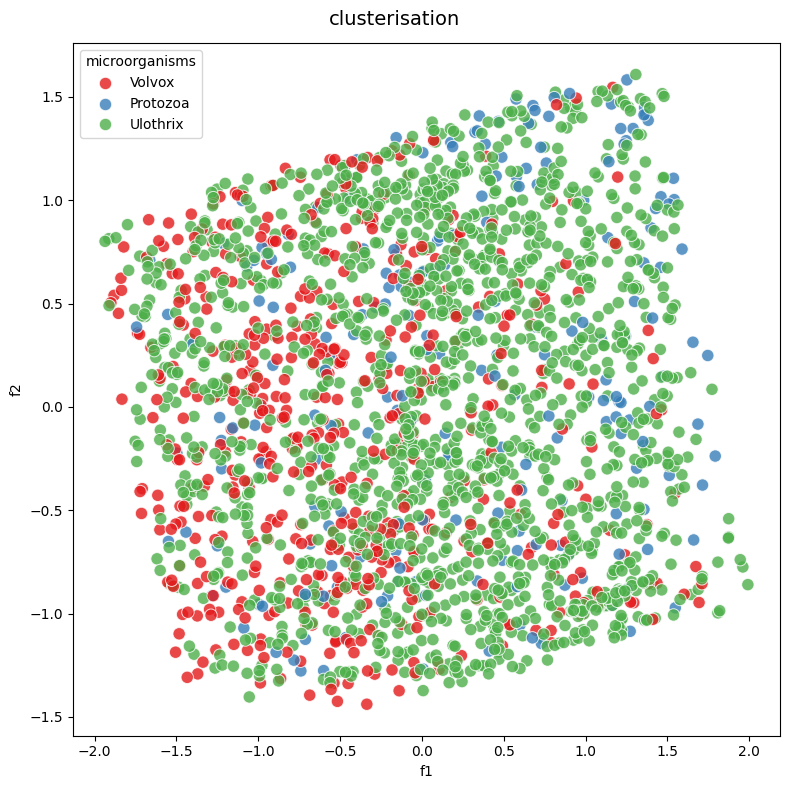

In [156]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['legend.loc'] = 'best'

pca_2 = PCA(n_components=2)

filtered_classes = ['Ulothrix', 'Volvox', 'Protozoa']
filtered_df = train_df_no_dupl[train_df_no_dupl['microorganisms'].isin(filtered_classes)]

x_train_filt = filtered_df.iloc[:, :-1]
y_train_filt = filtered_df.iloc[:, -1]

qtTransformer = QuantileTransformer()

x_train_filt_qt = qtTransformer.fit_transform(x_train_filt)

x_train_pca = pca_2.fit_transform(x_train_filt_qt)
x_train_pca_df = pd.DataFrame(x_train_pca, columns=['f1', 'f2'])
combined_df = pd.concat([x_train_pca_df, y_train_filt.reset_index(drop=True)], axis=1)

sns.scatterplot(x='f1', y='f2', hue='microorganisms', data=combined_df, palette='Set1', s=80, alpha=0.8, edgecolor='white')

plt.suptitle('clusterisation', fontsize=14)

plt.tight_layout()
plt.show()



We observe weak clusterisation. It might show that PCA is not a good choice for dimension reducer.

Lets now use TSNE to visualize the classes.

<Axes: xlabel='f1', ylabel='f2'>

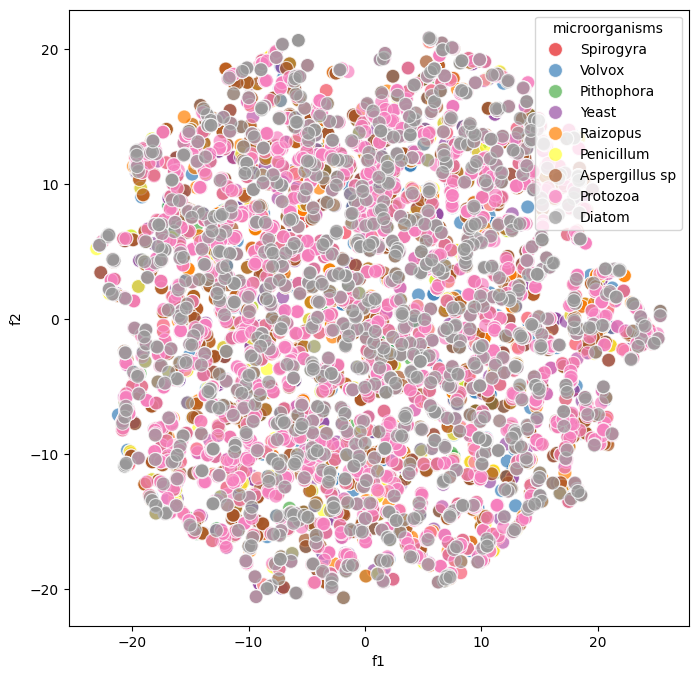

In [159]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=100, learning_rate=10)

#x_train_qt = qtTransformer.fit_transform(x_train)

x_train_embedded = tsne.fit_transform(x_train)
x_train_embedded_df = pd.DataFrame(x_train_embedded, columns=['f1', 'f2'])

sns.scatterplot(x='f1', y='f2', hue='microorganisms', data=x_train_embedded_df.join(y_train),
                palette='Set1', s=100, alpha=0.7, edgecolor='white')


REMARK : needs tuning, not yet final result.